# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

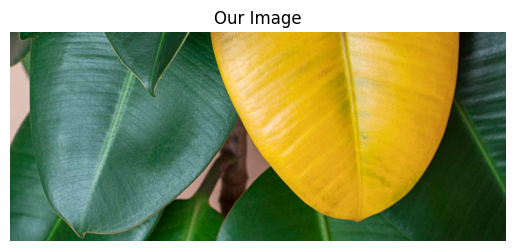

In [49]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [50]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

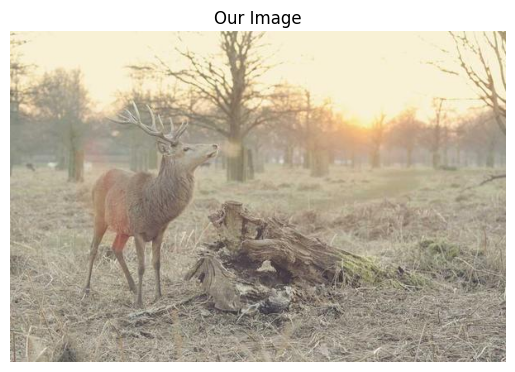

In [51]:
# @title
import base64, io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

base64_img = """
/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFgAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAFgCAAADoAQAAQAAAJABAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDc5MP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAZACWAMBIgACEQEDEQH/xAAaAAACAwEBAAAAAAAAAAAAAAACAwABBAUG/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/2gAMAwEAAhADEAAAAfYuz359vi2WSXCrkJJCSQkkJJCSQkkJJCSQoSEKXAbuEWwTjZNuaXoi3BLo387qUDZLLkiSSEkhJISSEkhJISSEkhJISrhJULkgkmLlpuN4YHdkxuGXiTqSXYQRGyr1JJCSQkkJJCSQkkJJCSQqXRcqEEhCvEyXTKllrupeDl73nV7FYtMbdtRLKSyXV1JISVC5ISSEkhJISSEkhJKLkhKuFUQhLKA0RSpaCxmPo4BsbBLeHrl60zMsdBurgrHQaDgGSSJJISRanWMMt8xNV1jVjaorJg2BKYiyBdy+jQ+X9T58KLua7LBkjzVLGVd6lXIVRQkkJJCSQkkJJCrkJJCSQEWRagjDQOWZtGLRK7DuRTlq1GWBIyPjpqnEuR2ac6ullUuugOY5dOrHtsuSXMkhBKhIPRjcttoKzbXKnVyCHWUZ5uRWfUuxvNaSed6fN6NvbpWnIiq9yVBg5JUkiSSEkhJISSEkhJISSEkhJIQDhnJ0lmDcoDRhuUehwu2ZYEsTq830JellQgeog0Fi61nSIzN1dPidDN33V6zJAUogc1o5Vy9O8TLHXiuV9qcjMjMsr2Y0VrSGE3hfJpG3n9mujv4LMuwKkJHYpnfRPGaaiynrOiVNy5VpJISSEkhJISSEkouVZJVkkhKuGdWvPnXF7eRK9CaZc+VcjoaGjpZsb5wsm8LICsZAg/Zz9+ddA0aMrCLAzs5s0/BY9MOZn2ZuZucLdfR5hZdXBVS6ha05uXpcihzlm1lna43Sl678o5aUJtTBUzrSzEUu6stXPVBER7Fs1m4N6zckqSQkqyVYlwLxopJqKC7xptS9ZsTXV4dg5uLNo5jXUmeHJamd+O93PLG9i0VTaVEOglmrXztmd7C5jJeiPMkjc8XvLCi7E7MWiVatSVq2lKqa+ZGw+cNdBKnxny7clNdm0RocpEtnYh1GKOhGnOtSYrNbaNGbo0c/RGs8zLzbay6YKqXKRoqV+cETbtXL01uih3zA8mjO3xMRw411rypy1o57kagR8E3L6cruRZKog1EuRWa+wOm2q1YuaDIGtKJM5DCzVThB0pgeemqaEDCJc8ctCyGCnpzMlvUFhhGyqhgEapNaKSUuh2Vmax2a86ezKeLsZiLM0oWqtF5w2JVL6ZKKOzReakZo5ra6iswxIi9ZIQujAauVS4llVayUqi7GyxuwVuTmsaDFspdtCYXIy6SpYy2JiIIopElodMMQWhhkjqlVm6Mzeax6EbdTQjlrVUMSEyVJ2OdEzOcrbUanBuVhKkrE3SEDk6giYayJCdi6YuwWKaFKtFiVVVXVlDLS5JYMFiBbrFWyUqOTF53pzT0I2zaowdF04blZFGVyqlsDCG59PPa3CLiniCOWgVN1RLZkVmuQLC9ObVqHYPpa9C1XozNzQBgZtMU2UWL06LlwkEwBJWbpGq1m6odBYpiWMiKYl0MGDqEB1ShaCLYnRC4csFptzcdbgAZdh8zdZgT0ecM7HJ6U1amjKALVbqmdtymnZEeCNorFsy2sPOQ8admne4bFC+pMObp88Q5TS9CthbQKWLdRmNlKgdaRDFNleYkgg21WyrFrdCUIo9QVVtTEcFRM69g25zOIRjQYjdJ0KEbM8rbSjg4ooIhhcCA59BmPeATWnGWRRJTW7lVcTOarK0qlhBAsIIK6zzbc3o0N5kMAQsegTE3VdqnDIbeQl10haa4ix0xkukU6RUbUAYQMLsuBUGugo6GBEBI0ROoMAMIocarsbmdRlvaoVDgVqujtdQyqIqAyoK6IQTOopipqHVWjCGxaX5rk4otSxiwyU2G7sHTzWpcMzDU6pYrVlWyEldWVLEl3CRZRZhA6EQ4ItMtUGDVJIZSqoioCsQiWaDYlZZJKDlZqbed4ZhQ6lQOIg0AumKZQNyB2uyUAjajJUZ9WTO2Aa2mrJdilOTvnSyCrlWsYt8attlmJrRVmN9ZmkouB9Tk6Y6kzEjbz3BmmqYMuKJC10QHgkRFLNKaAUNrRUwGnEAk1VqmLVIdFQFNCjXcRJNsCRQ+lWSLlONRwUqwbWoeQsAsbFnKKyasOejxS+bFRDVBY65rUatQwvTDOqLZLolpTBqXnTfzrc2izhOPqc6tjV5DqBzdY61MNSRYAjUEW7E02ICEUygrF6BRUsAqHKg1TapKkAY7OYUZdggTISt6S16RrLNMAswhxZ2hEsg7CSXarDJUWuR0+dN7dDFS81MK9KHt8vXLDZjqV2+T2smEJsmETKYmgvMShq87ic3YNPwdJNLreoTszOlpagOhMG0aSNZLZUi6YVmE2qBz6DVDHWSwFIJMKWYRZRgI3LWWu0JLEjFvoRHwo0mOCjgKJlIt6kgMoVZXLgtTrdGas6j0Ob2JtnF7PKvPap1xg3YelS3hZdrYTLaLM2TrJrI3Tlg8oIt3Oz1K8xE0jmONSGCJa9QlqzroN55ybpjZJsGOFxqaOIg4VSG55RztJhYMXZqLHcbGc99u/GgTcFkDLhztCXVpJDS2rkMs1FktYIuo5+oNKpKtacjWzGuvL0eemq0GuLo8rrkaDEpcSZ86XUTFurnZtuSkg5eh2vTGvP3cOLyKQenWyrVL1qxnI2Y205+bZJpdldzL0phsvE40ILPtCU0VabGKWCbVVBTGXUG2yguK1Ncy3m6YEEaXVVJcUFSZWwQhY1IqxWW9DCRyxWHp5l0c+22NfS4x9TlOreKbiczQVY1NCtGoWRncsjk3sRpkdYhhjbS1NVWjTh15puWuNGDZnquhzmJrbj25Gzl9DJmXRjh+nOWi06c9dGZNEiR1UJW+tXOQNTLpijQfPM2LVa6JUjS2UFACHCFUyhCCtcH4tmGtbMzYao4LVpUczVa66FBZj1Y9RcGhsyGHnPKbjzNLoBOnlXqswNyWrcWwzns7GWxS+vzs0Ib1yQX2ZTmoFPQVGHdSh6zqCqWQbAXHrsunVKxmZtNz1pOWWsLMjNDowXqK3JNEkYlkVoBQZUyKGwoV6BAqLLYQjKSYooo0Y2LraNlGVzIZXlkDysdZjm/DaZc7ojJn2QjD0qOYPXuzndPkqr0RcPTD8bZKC+iBAvVLzpqbYloQsYwWbkQwlWLmgQjghQRHKAaYwChqAYAcslqEfMMs3xVS6lUuGGEW8W4UzvrNTheBLCgShi6qzWCk2EwEC9FArZDlSyMsTqxCilaxrJWujN2sCDXkeyOOHQPTLuzOjTWiZoVTjIro1WHN0kI5wMlXCsVZ2IhnSY1hSmpI3MyGlk00RKpGKsF0qOAFYio+AtQ3IXNyDU3AoWZXgVIsNC6IxIYh+cXl0nWZHQpMj17lyXqRE0AUJp6LAqMtILYiLdnAXpsytcQmyEwdCOVg1lgqoqdR0LInRjYY1RHcZWaElWpxcCw1sIAXCZtJKpqZItROMpNlLo1gxkCYBRockpQmhCKMFF3kZWm4YVhCLrQc03EuVpMRFaLEMbDOb0SjTLskoQ4FFuUQSHwwPYo0kGY11BlUGmWZ2EsatzBQ1oAVRCzVQ9csyL6YVle4znvlmczuCNUqiKCbZZmMnwu2IsGXAmQ5Tl3GnFFEztw0l2WanVdjfm6JQQdJKrp6YYDAqiHSIMCF2Li0voxPuF2eM1qNITs7CBpqCQ+VnfSomgAplXYnZkVTMuwkyEwFIquGasEDHFK6KwERpGgpGJns7lQxI1qArDKsSasejMNj4f//EACoQAAICAgEEAgICAwEBAQAAAAECABEDEiEQEyIxIEEEMiNAFDBCM0Mk/9oACAEBAAEFAh3L/sf9fF+UcNjh7lfiD+E5fP8AHO2RnACXX9tl53FPx0Ee+ircyBkYPZGTyUsf65F/IzNlWZ/LJg8cfJn44tK/vei+IEoSV/6gOr+vyM2IO33Q/sA38mFjMPDYq35VHHqF/G/HxMiSq/t2Lh9kctc2/jBsOm6hm/yWsZhZln+rd9SLjs6oGDL0uG5nUvg9l3rEM3dycz1/cq56h9KdlmlTCfCZxUYboHFKR/TuWIeIGsdSMeHIDcPDAq/QsAG/9Dh//P8AjACd6Ub99b/rbj4EXEIQ9B/HnmRdseD/AM3TJatk1WzCIOlzeXLEvn5EGP3RO7khfLA28FzhYpDCbrPF57lmsBXcmoyq4/KAXKcv/wCf8bYlnGFE2dCSANq/sG5ut9HxU4e1mX9MWXudMX7LZhxMVVSsBlzueZYVdENUczHzB8iZd9FArhTQjA1X5CwdzKBjdJ3RbpocX5YMfCjuGZIjWfzlg9/ikh1Gg7lmuf7RUNDiE8wZqwdCwMVwmSLx+S4KjFepNQcxmqFudgVBuf8ATP44eR8yAYVWwBWsI8ehwq03dJtjyQeIyYgSgWkLhcRXHm/MB7IM/HbUK3GwPw9f3GQODl8lyFJ+Ta5AbXJ4/kHPeNTcL8NkZYzFprS2YnEBrpiaKePkxqGiYDDD6Y0uwEuNq08scR1yDN6/Gyb4yB+Pl/JysqXMGLuMiaHp7HbMoiC+l/2smIZIRuM2NkOFrxfkLthTgL+jdwxgxiE6hzNpfNw+xMXPwMJhfnLcXMY+TxVx22fjvUm4dOFhbilV39uqpO/w5OPPndc+LJmZx/0rpjXY5ImSmGZY/wCRO9YGawGOvlHvTE2yf2DG1yL/AJCtjwZtD7gyfxh9kDIY82m0Jn7QdFicQGX0LAQWS7VH2OO4xYgZGOMM053pw6bGaiZWp1xhlOAMSgBx/wAebLSZcgAZRsy4lyTHhXHCqwYhWVZ2+FFKCRLsWQuH/wA4xqA/7zAIFNyulQiN+PRy4UyY/wAat3GTBALn47hU1DR1WNjqadfUEUxMlT9ulwiFgA5JmJyuR10yJwynQM9nu2cWcrGzK8VqmI75g1kmNk1mZRYOykUUivpP8nHquTeH8lhBlLQGjdwZPJnneoY8gE7sDbS+f9dy76GfpE4WxLvoTNpyY+LRtjeP8nboDEzlYMlxn3g4LczXwY8iL6VTQ4m5m3BbhjZDFWcc5PNdYpJxeRBEDCgDLbHDkLQZzP8AIFnKDOGjLPZWExAtF57MPRVmNI2gXXVP+V4innbkfLbmEwtLi+umU0S1Dgz9ZcuE6zuxnhNR/UEEuXL6Xx0UwuNd5vLM7hEZkabCbK05lzDMZ2li2NqrqI2TzoE6mciB4EWMoWH3B5QUIHWeTzQmAVOD0RpkPF8cwHhWo3cDcX8LorGebcbVNouWBwYxqMSSQJfJjNqS8Z5cPMcRTY/0jqPmCysSuQY9ZVRqtReIKt3RoXrCrSpt0b2sPr94gURvgrUSeS1gQGD0PZlzaBpvC3G0DQtULS5cubzvWWync5vFcsfLxtcLS7n2el6npfWvh9/FCsej8CJuQWzCIpdWGq2TFFDp7EZAZys9xZ+0HXiiK+Igly+t9LlwzagT8B0ufd8LUcCV8mF/6x0qVKhHz8YuyQ5N4hEPvpUqazW4UlQS59wT3PrpX+i5cMv/AE/cEuE/A/C/9H2PhfWoZXX0wOxy49mRKDZlUh1MHR71SyglcMIpnuDnpUrrrwRXQS/9H2elSutQwe/XQ/EwdalQCVKM56mCVxz05nM56H4aBkoRuZtFVdjzLqbCd7cseA0uZDF/XH7HwaD2fTGfX+gwH4/fQiAiHoYehHWuo9/Cmh4g9QQLwfjcM+vuA0iEzjQV0Jlz3FUDp9XDE9J+0+lEUeeYUy+5l9/X2J96SowodDB8fvqIfX19Ho3UeoqWNI6GY+JqYvBbJ4tc+oBE/RuZUqcdNYff196mNxiHqXNpcGLx7AirqKlQwzH6HDxPUqEc1zryymVQggHE1hErowmsq5r1CwQiVPULGdzgNcqCMLgWduD1UT9OhHPXURx4xPYup6jvBLgeNVM8GWLl2n5BuHjoI3AxUz/DJ+rQxJXlpAtfN+gEHrpUrpUuXLly+vPSpU1lV0qV0JqFhDkWcdLnv4XGPGsCkBf1uM9k++pPLGCLxDzD0HocjF+9wwHo/wCpS42MxFmogaXL+dCEQGoWga4TXTabX876iHpU9QdHYCHZgMCwIvXn48fDaM1Az7A+V8kz7uCKaOL9j+19NulT10vp92ZsTNWgBjGbzaAme+vM563Npfy2Am1y+jBjAr9NuaMGMA0IeJzLlir6WJ9yhCRN4WlRv2MA5MPPT6Mufbep7gn1hh5lNNTKqcfHabQtLm8vniUJQldLl9dvnwIOnEodebMBELCKZfW5RlVCZ7nEPrpqwauaM5n2YPXwecy+fq+YBDMY0XabGbGBrjFVm4gYHpUrrUrrcLc7zabfCpU1msPEFQ9ApBM5hIE3l9Mm0CGKDKHT7l18D0HUsem85MIhg/WfU9kiD1cM+pcxDbpqYbnIguOzLLFDabUqmX0Jly/gR1EqepxLm02s3NSYQ0XkcrNpsJfSuRLhaAmW0As6+X1Yrgzmpc4M4ALSzLhYxbLcifV2W9p+s+vuHr76403IGoHuhBCyiO6k3ulVA1HbabQchWm3DCXLn0zUe5ZBuUJ9cwQsJ9fXG3vp6hJh4itFIi8T3AQ0qiSRCOehm3Uz7H6j1dyzKlAT0NgZ9bQPcMMU8fdz76GGXLmL8cmKoArkz74pkKkhUm22QiFbCu2Nhnqf5FkkGF9lV7gM2ATazDxF9bTYRsk226DkamEEQvwSYWIP7DJF9DiHaCfd7ADgLzLN6yjQMdmqzK5+rlQnnfkehyGsSzOZzDtRifsRD8D1wrs9w1BwDcNyrLjuKUuMnJg4iFdowRSD3DsJp3Bo2nmIE4gImw2WFWE7YhFTkwT6MAEJqGy44jps1AKKsjoKlif8+wPZlzacQDk++RFaVR2m3CqplCXxfTU9H/VjMGOl0Eage5xDYAPJi8zAgXH96+TKAt6obtvdR6sClqUCFxmx6/J12x+Kg024m/ixIi5xOa7ZM0USgIIRUK7DWl28to7GAkmVux9H3wZYupcVV6f83DV+oI0qUYLnJFGxe37QKVnqXG6H1sZczGKN2jnVf+cePd3FYV5BQhsmNgE9elvn2xfY5OZ6jEkcU2ZRGy89wGZVXUJzj3EH4x3XAoX/AB1naEKzcrGW4lrBkhbyBiy5vy3MI41nbLEYiIUs61K4cXNbBXg5Ai97HAeeLb305ixzQQ8cQTWpZnjCKl3CDAphE2Gph9AcPMIVVOUCZn2hmIaL7UcFarPzMY/nJO37P0ABmpZ8mJlnfyW+2Q9lxiWpfNwPU7k7rGDJCLVNhCFcMkuoboZHER/IZYDcrn0b6A9L4PrjX0bjNtCDFpJ/keZc77mbmXBREYcAQ/tNuOJ7In/MqHg1GHHEBAmRvIf+ebwXki4PVmPw6f8AlmWkx/8Ar/yFqVzU+shKr3GZDTSlwhcvDVHqbExZ4qfGEy4HIinYByJtjyQgA3z4zmrn8qRckA2FUK1hPPcJgdtmntG9E/x/rHNjsF5p48xW2ik3/wA9whFck8ifa+/c/wCgalCepdgiXPUf16hEIvIimyfEYSZlx6PjPgdtMnvF/wCOY8Y+c1gGun1QjuqhMhMWrKdyHGRNxL6B6gZSceNsi5tke5vMbWC/mjkwsDNoOgGSv0jVr2Ki5WEvktZ+m1AuztQ2NanXa09seVPohrUqgBDm+Pr9YW4JqCBuYPc4iBRPUI5MU8MIJiGxMoKR6yjdcD65CaGfg4WtM36/ji85gnLGmaE0pt39QeJ/RsuH+RtprCJUTE2SKhVPyfxjklkQQjiotrGUuNyIvMbiAWjZlgNRwkLFUbLqBl4gbnLlRFDAoZtLnubShQeVYMsNH8Te0uztwDNSCFs1Q8otmACbVPsjkLzZ6YD/ABnnobm0yqUZcncX8r9sA0Rv1w8Z+J9bVHyBVyZGsUiq+8yfr7iWBoKdahoAzHnyoP8AIed/IIx3eY36EUcZKhlBL+M3KjunHixjuKjFHsNA1LquRBaMc5oHWPcwLquMgq625wkGgk4yQi4AFmWlgfuTaoDxyJYmuzuNZUP6qrRmobbFqMYwQExmn03jiQa4l/Yi5U1BmUbY8D0c9VwBzF4zM5i5NgSu2RdjjRQMyjTEuqAWT7K2OaNGNjhpQy+JEEK9AIqlWKzYg2HjoGgFzLZTGdfxGbjXuZKKgchm8tA47QhxkAWG2E3m3iaYDH246lkRVxsqbF8Wo5GJMuwsELxFEuyG5JINgQUeno6XCtQ2wqpxMxJVOVrnXkmbNbGA078kXWvP/wB2DGAVKafQ4nAb7Wh0JqE7ImNCrfhAtkwOkRUaP+IL7bT6xfj98n8TQHbHLDRsJaNjFuoOLskhtlbW46HRceTQob7ewKaFLoDnaN23mosBN0FKfGBjLAlCHg5FbdveMctjWNwEJEA86BlARsdy+h4IO0a4Bzvzt4urCbcq1ywJxNotW+KoeJzNajeOWxNxNrBJgLQvQ7qlgbVWjET3MZKs/wCQO2c871qv5ETJ5BO44ZMDsxC7ocjfrtMllhUDgTZBF0hM22LYwIIKu9ZvAxttSBqBol9GUQixryxJjTssYMes0ECWxXxxYv5smQJFYvBOAITOSNqJgoirjUW5iwNcOQKA831ntHP8nMd9QMZK1YXGIASHbGk7jNCnC4+atwaBGygER+VCBjo6wIzxlKBNTiVwIcasMj9pjq55AsgbFkABFFSUImMgQS4xFeM1AUjZiKD2JTO3OoVpZ12NEC9wIKaVPcLLYI2AFULoNCQh9gCfqS3CQCpqAxEsSgx1oKpuhTNRAMNGFSYytAKUjlLpcVErFVWJyYlL7iHDtAvbnuZLs7Sww2onXIjMLAGzrixtkzImJ3DlW1i5Wne1C0MQyIpGNGYoZ5Cb1O+jBXXKn1zKabMIp2hfyhapVy+ahvoTpNsk3qD16lksFacCe4TqbOzFA5B6chTLqG2jKQHJpQxABINkKAhrY8AsygjJwXiQoRC+MT/I0jflAw5izqMjRQISoAowpUHizBCO2FdsR2KZS380HcyI35KIzZEj3lxlHEGMmJjLT/H2HYKq2M93FrCbjsqlti2txS6FfI0BDkUFyLPgPc1JmrLEEANi9Q6wMIxav+QPIUpsa3UB5CccSxehhZClXBwPseg1hXqHNcaeTjzBUllbVZu2QlCZo2QriALahgQZq82xqXyJTY6Gg135DbFk2miGegTy6q5FK17RkqbCK1RanYFZFNeQJE71EZMiwZWOKi0IAI4nEyAq1cDHUuXLDAGozBhoDKOwFHyIsVyrUIF5rUkirqN3HhwhZqglCd0CWTBqJ9k2v2qgwxkG+nHaN6Kq8xvdkQi4w8VAAJqXU7lRxzo1+U7DGaU1EQA7EKYmNFJ5lGawkJPZ7QMCBZ2+dLjYmrlIG/jT0HK5SUzzsnZLsDm9Z3QYXDGjSNkELs0q5obENUvnGSBDQUzSm1uFFIqp9j0ohx2EASFzOKOoiFy2s+jB+u9S9YLvXzJZnM9gfqE7YrkYzNBGtYGqKvJna2gGrHIjzdNswKqmfHa6snubc8WfQ5hmu8RdS6xX8rokvsVsU0CzXVdQh2G5HcmvJNC5RrS2C0CLIo9L5AuFWteYWhyTZbsEW0L+fBEYeJ4gtZS7bXF3DbW+uvTWWYWMow+/IkFlWwQUVoRQ9GuTzAePETmKs9T9oAwlMYMdDtqSqjHHxq5XCULK4ejObPpQFlak8zQbQgUKM+mAm61yIpuFLAxgKWrocZLdoGa8ogEPM528bIokho1gbkTuLABGGg9w7RHa6Ywd3auczedNkxB2EDmEzucFajVAhU8sVCGHSdsTjeln/wAscYcMrTmNkm3ivrjWM0yGL7I51hK2L2sQNUHMYedQ/qOm1TeAuYP2b1wIEDzXjSFoG5c+O5WWZyJtvA3Q7mEA49RQu9xsRxdS2uwYzK8QM87IBJClRLCQ2QgG1AQs02LIrM0uC0lzuWP2KWx3XUopgWoVUH7/APignjTZQ2R6KsKj8xH4BNAiVZM4VfKh62YFWYw+JFvAuqgEQ8qxAiNY24Khx2fBPTFduRNpusZor7DICwGMCahg2MRF4IoABZwYcfNroOIpBjeJJOy51UoFM0G2vl28cbIom1QGMyL0YCIQMf8A6SrSykOohsQbQrAsPIbwxhv43AGTGrgOaY2Z6QTbaN7cgTK/RTFMqc2TUq4wIhqc0GBGQKZVghSE5O1Qq0UNq2pLQENL6c97VRCqqByoxBRxCwBRpkNEtSjYxpxewMUADic2becw7UHlkzbVXoR/RZpTXuuOecJsbjGC0JDNjMY2SlMmIOfCm5UZGKecIAXbkWZ//8QAIREAAwACAgICAwAAAAAAAAAAAAEREDACIEBQEmAhUYD/2gAIAQMBAT8B+rTyVoe2eAsPVMQmIQmENExCbnhdUMmLqWWj4sfadfysQRSlwmUo+17rCGhoYkfH9C4nJEIQnjXqs/BC4zFKXYh63opSjZcUpcXUydpi6KUpdcxCdIQhPRIfpVh+josPVOk8bj6biyj9KnDlyy/4LX0D/8QAIBEAAwACAgMBAQEAAAAAAAAAAAERECAwQAIhUBJBMf/aAAgBAgEBPwGr6dxRdR5vBS5eUe8Xlun+i0mFoybIYni8sGJnjhoSzB5/WKXDdwhIYsQonzIg9WIokQZBrKIPZ+R4l1p/BHofo9afkmWQ/Ih6zd6LzPHzPLzPHy9DbYvRcU9k55yNDR7IJEIQhOqxavMPyQSJrOBi4oPZ4Q0TRcN4l0rpS/Wfxn8B8NGLtvV7IXbhOGE7zHwwmIMeFmduYeFhjQsfzad+E69JpCd7+7347fefA+8+1//EADcQAAIBAwIEBQIEBAYDAAAAAAABEQIhMRASIkFRYSAycYGRQKEDMEKxE1DB0SNSYnKS4TNg8f/aAAgBAQAGPwL9MfU9/Ex/hebfgf4db8pPUUfpyV1slEv6zdTkTYn0eqjT8T8OrEjokwQOaY+n7+OipeallNS/Wfw6s0lXLcRV5DH10cjmXWu3k8D7oq6wTP1Pfxw/MnYpn9JT+JS+xuqvU8HFkz9ZHPRdBOLo4SckkFKq5WE+TsYgx9R3HuX/ABFVTV4cXLi/D9z8NYVP8hT0cc+RDyraKvoQeb6aSV4FVFqjJjOS3LWr1N03P4lRKpZuqsX+tho/h/GscqtGhGBLakZO/wCdks0XoN21HEoLmYJWmUOl3Gv1LodT8TiipvBcuQlyNnM2oVpfRE1U8Xc5F/qbETfX+LTeORTUsaSsq47Rp+JT3KxcUl/BfWR1fkMzpHXSIn1JpSjoeZegouhKqiGz+J+Enu6EV8NRvoy+aP8AE/5DScpFNWj20ybqslqavUn6u6LNr0MytH+Hu4ORtr9novw/bStdUVNeFt6d9L/lT4pVqupx0z3RBDP4lKW79x/w7Vf5Wf4sQV00+V/YnSu4tz/kP7M/hV03Zt/Gt0YqpnoJlFXWxULpBa+ks3Z1ej/IRf8AIiqC3FSN0MvapYqQ6KncxwVH8NrOHp2I0sXsedmSdL/VLquZ/C/FzyfUSasIfa45RTBMoncdSPFPhtq5IEWuY06kl4uTve03fhVx2Eq7Vdzeri2u4lVy0XUpasupep6RGkCjSY+ribodNfmIflem1o2pepB0Rb82eaM9yDJt2kG18yEi7HLkixNRMQPeppIrdng4fKyz04cdTqS0juXwWGYLnX6VvezJnTLMm+mZ5o3UeY21E0cVHTppdFjv4LeDBPhbQug0XwNVKV1PKzBxI4ZRNx1V5OxkglWNr1S5Fnc3VewzJkuWdjkQXeklvoMi8FkYOhuoq4hvmba3D8Db1sbvDnwWzpNJS+emb0k94ILyeUmHBuRfwStbFzppksy70upL0ifXVfkR+QrZF486XX5EeCF4OpdwX/ETRZ+g1+xkrXY2vnpTUXZtHBnW9iz8GSXk5Lwoj8xvwN+CmepL8dyfo8aSiYuWO43p2O7zpYudCGW0U6djGltblv5ffwysl6PcxcTsdi3sR/KbfXQ0cFUo2twW/wDSX1QmnGkc/BwuDiz/AOhdyU3uMwQbnTcxpLwcNl1Evy1/J8fQTpPh7Fl/MIek+BfR3z4H/Lp8LF+TfS+iSF6D1X8nx48mfp/XWCPys/l2LmDGuPo45HUx9Xf862l/qrkR4b/mXF9HfXH8ywY0X5CggfYjSxBPhuYZZ+C5H02DGmDGuTHgZf8AJjTH5q66y9LeDOnnZSpj6e5L/Mz4O/htrgjWPFbwQRrBfHg59ymettEK5m5OufFPht4reCHrDel/FOll4LGNZMflPw2Jqsjheklp0hTDN1TP21e3BFSPILaQrP8AcgvCPXxSZtp2LeCNUW0yRJkjny8FtJeijR6R4LkFjGt/DPi7Fl4Y0hr3FWtMjm9z+5kXIsvY7m37svEGI0ujn4cHfTmXemeWCGZ1sX8GSNYO52LYGRrdE+KNdz56MgidL+CwyyO9WufBD0QozFzuMuYklbiKrHVC5eOEvBDOnhwQODrp3MEeJxcwQzJ28GPAkJaN6QVKCCykU2kgVtUbkT8aX5ET7i2osSncc27ItXK7o31VpkN/BaplmvclJkNuC1W44WcRNN6f2LE62I1vrPQTEyWJTpyMX0x4GiM6Nli9zp4o8FRuZgpjSepGlynsUoq0qO5BMkzURZohL4NzMk2UDjSzRkvUzdMnP00sXJ+5ZnQiDlP5M6Ig6l0pOw18HcvpPhzkz4c6cyZsSQJjYk86X0nkSkYFBSe2kzo7PT9XaETvVL/1I5PvSSqbvmba2pKuRbHQwZUH6X6HlZiDP3Nu59i/m6lrl+FnC79jCLyi1VLOJR3LcVJxp0epZySY0xCWjJZGk5JG+Ym3gyNIipWOHK5FVXsX1fqLo8k/GlvuY0knkPvpghEdC/IxMfJw5q6kLynUtl6e4lrZx4GkpqJcfBu6Dhv0H26mPDZLb/mIdtYHF1JbiI27auqIZOlinkx76YRwtr3IrJVUojJFRMQQlpgS0yZwNNpJ8zbGRJUp+xwKezL2EvczOncZzI+xMi6EGT+ni/EZHzonzLcvsR1L628MEcyPl6fYTeBVfhrcmzyxSuxbXhRCN1LuuWttJpcM3brnFct9i9fwTSUqrocLlDaq2kxugV8kx8Fy3wzdz6G9VSjmipz20nmuUkNj9DlJYSwS89S7Op21xYpg7FnApM3OKz6HYt8E4Lxo+7LmTkXE/cl4FBfSr0PXRlhRdsmRntJ2Y6efMcK8YOhb5jThwXcnmsS+ekPTBAy3yXuJimu8/Il9i2Sxc/buRVBDuy96HYqUpp8nzHZ0xyZ0XoKyJh/IqqH8ktNNo3U/c3TCZD5cx1PoK7g5QK/9SV9jB0HtguWzrSs1EdRo6aNlPoS9JRNz0HS+ZTBEF0exiJ1tg/1Mmlxt5dSep7axTJxzuObIhe5iPDZwczcmYL2Z36kMjshvuJ1JHNM7EYJfW2kOptxYi8l2vQnrpa5ZZM2LTJ1qOK67ls9iGrm289juxkZemWK9i715OoknS8F0bVcS/cgnkWGpMWPQXce6KjLUiLE3bML4IMm7OkzryfqLqblb0N27cu9zKdPQn8NkKlt8y1MlnSn0FKldiITXqepw/c2VJOop2UwKmYvdk0y1HQ21Y5nDiVYhUNp3nBlf8jof2IbXe5Z3QpmmpkfiKO6NvH7pMdLr5cx8W5F3pxUnIVTTSfUlO2T0NyVPb1FFiy3F1AqUslkp9Camzhx66/8ARz9S8r3OZktcUPJbzQS1ctdlkPmcyyuULTmU1d9OGRpmGjmcizl+FUtunqeefQ81VNS6m5efsNbUTI259mJqnmOv8OI/cqUf7VUU1UoyQ7jU8jipvSKHBnJbJsysz0Jnd7HlSHbJ5Lf6TqKbN9CIlehF79RWnpIunSDmoJM27k0sXWC8e5veSamWY4q+59hPkmdIE7NFm36mbMUcyTkZvrLbg3MnJdQW+DiRZWO5IjJLLkdSVJh+5xVKTEaThdWL0jPge42ybk5MHGxQljBiGcVu5TT7P0Gr1Rhm2/Z9CHfrJez5G6LoukqHaxb2J8zHNjh+xxeYVjc5V4OFnnUvkPbcvbTiUH+H/wDTimBwZsedInd9jJFy2C7agsOzJxKiC6Iufqk4l3Ohj1k/USWwSrD3GSZyQmbiwoP8yOZ2OE3fuzihLucNThZFLldR7nHoJpyTvsNqt+rZep1e+nDpa1Q2mJtExVu6IUU7ancUp0p5M6Z+BVK7d+yE4VswTRUNWn0L7V74OvsOl04uyErdSHTA+H7kQ12Fwv4OFwZUQR5vckxHYuSpg/UR0F/c4YY5/Ysk16GNJ5DfMwX+EXOOuWZLT7EpW9TCPLguXyXqFVTdDyY4j+xbA1kV32LKWSzysz7ZFxe1Kybtkr1FB5b/ADBxTtfch3aLuEcNSFw3SyLv1ZyZwxBam5tTeeZw3jsO3PAlVCq/Y3RM8zi9hSnDwZRml9jKlZFS5g4ko/3ZJptIm4E/2Icqepww+2B00fBMOkfYyRJ/uJhMtXb0OGDy3LradTn0I3XfOCdqqF6nFTPcaMyOa0TMvHfTLk7lymxem/UUX6kciUNQX5FoJginyrnJEmMl1cwtvqcVX/EfyTfuOaSKaofcW7kYlnI8me4v6kuo7ktI/siY5dcnErn8S9y1MPSZLs38/wBPbuf3OUiiKiZ55OjWSFbvzZEMnbxIyiEyXzE4n2wQ16PTN5wiVk5SXUsskoOvsRzXNjuN7iU5L+6JjuWp7mf+jI/kTbk5R6EuuPV5L3fwecXP2P6SYuS53F5+RzgjIlBDruNGHD6nk+R9xJFkXfyRY5aRzqIeC2Tt1Grux0fcl56lntXQyyLNmHP20fpzOwn3sWcl3t9z95HNVn8nDuPM1Beqeo15pdmJxF8Ir3Ux3g4XG3kSvL1MjnSwkvsZt1RseFzkmPgmpL1JRgydiMXOpd/9lkiCC+NG5Ob9Uf3OKuOyIsp6Iae5qehEXSM0wuxm3oZRdob2fcsmi9VfYtX9hVRgbh35nMw4fMVrMmdwl9jOi4ZJaQoxJLJHuv1PKbcDqUVEbWf3GYPMXTMeo+RCeOZek3dORho8xNL4ehkjzI8tnzLENEpL2JiOxJgatOkNxzJuiH8xp5fY8sdeWl4S+dLXfYz7CeEy0MZBi5d/Il72MczH3JrbLF6YJkhfJhj4Zkuf+Ov1yXS+Cnb3PX7FV5iCYk8rRwjnDwhP7DeszZ6tQPJf9hx9xU9CrbU4Z/YmbI4WifsIxYUGH6i/oKWS1c5mEbbacLSJmesGZJaW4mxY7kpl5nqRu+Bt45jhcWWOakzoNfYmLkXXoQRKnS1Kfqzipn05H/jEtlRGTiVi7XyM4URP3PN7Fpf+5kXYo+OYpdXQzOl1gi48uMiLVQP1Wqf3MjZ3qZc76IibnmORK0jCP+hqSNxYtZnfWXVb0JTXVF7DlI8hu2smLEPBKP8Asyc/ZHlqiS0fOnNDu2J4n/MbUoR/Dox16lqbl0XG1XadLNfGi6m2lMl5MtexO6fYT5l6ti5k3ccy0L3Gpp7H6ZIsmR+5G/4Me5Dalnl+eRw8ux1HtqU9yXNuhTDeSFHWTH6jmTVguWV2KeZPTBgxpZLuXJqIIa+5Znm2+p5UpMQiL+5wU5OHhHFTbO5yXeoaTZd4ZmT+o5gfFSedvvIqof8AY6FtYz6kvrYvbdy0tEl2x0roY+DJCweUcU1XH5idvF6in9i6HT+Hj9zMdiPKRKL/AHMySp9R1REfBLbkpsoPLSmWrRzLp+xF/UlekdTZz/UTS4OKd3Ummr5KFazML2I0tjRIhDWqZ3O5fy9WUxMzeOR+2nEl7EO3MvgyNYRepDaq+TjieiLq/UVz+pZ0yi1vQnrY9SaiNlu5FP8A8IbIjXhsXb9S2CCGjh+NJTE1TD53Lv2Q2qfkllqbf6iUp7nm+RwnfDRw29Sa39yc9yaYg4qUyml0qGf1g2811It8E2+BtOu5zS5kbqvgjftjLgmlbWQ1Y4W4yON1jfdurly9z//EACkQAQACAgICAgEEAwEBAQAAAAEAESExQVFhcRCBkaGxwdEgQOHw8TD/2gAIAQEAAT8hGVp1mamZg/1W+Jj6JuVKRs/HyKJ1Axw3PcrwTMJW+/MLc2yh7jxNpCFct46/13H+LVqr+pKLgHxED4TkdM2TaNvqCIJqFsMktQq9dxdqjgJYq58zhQceYXz/AK2M6Gn/ACts4g3wh4merpgnGDI+o3oaNS+ol2W0dwNGFGiXBHT/AK9Zx/iXjZlniFXV4HmDWpjgeY3WJlBWRfxBoef8RU43JS6B1Am6L7/1Dzv5dYlbJQ2RaP8AG1pphFOvsCLv0TnH4ckoB0PG5+4TiUvT1A+XuUGiLx/sVOY9Pho/amHsoCmmdjEla0JQ9i4FhrmziVDyG3c6PrR7IWLUGv8ATWi4AWPzUw1wZrFreUJXnuanGJ9Yq6I4AIzL8gh9Ixfpse2W0oohVy4ZJvX+N41/qopZqAQbYzyqTcyLEHpcd5j8Lx7VS90sxMqi2ON/F8c//vxNMpMlTCjjZA3h8Z5+HZXAvTCtV7yTbH2Ez9G1ffwwyEIUekI6a5y4Go4iA4MbguLTQQvRj4UNsLFk9/KXz/8AnXP+Q4uU7s+pm9YmbyfFFEjMl5M+nyXp+PcG79z0XFzO83Lp0PMMsPmM8rxUw4vyhQy3OYgLlVxCxEuYFr/mnVYG0vUMRY+IQox0MqAqlByihYLd6glLH4FaLvcaqfYYBUoLcIFDylOMpinYa7JhCziF3CZPcw9RrzLnPjTLKeg5JQVuBwmyWl2WnxAD/YFOM3AOnzzYyVOQXfwW/Qpm9Gj4NcYwj1PFdQoxQqtPBMnL8DJ1La25QJeDuBWWZmSKz/Kgg0HFcx2Si2punMYdagME1FVFWzxKG1Iy6FxUqTaRURlOXBIXzmSGLuTg8wAKJ0/mAEcgml9MCzmcJV8EtEtbeoYKjwxKZN/7eun6iv19AFj5jM5hjQyw8+JWoPNdzinTFGZFt44+F4QYADSy6zChYJiJYdwVD6mJh3NwXauOJbXaJTqGv81MwRRUQSsSl3Rcyu2BR8XB3cIYDj3yzkLxeIqE1zA6RgCvmf6Je8nk48MHi6mzlHUOBySxuKcIMqqnGoEgjr4XEUJNn+0wsq2aHUsu+JNPmLlVvSwFQMKnmgueN5INBLlZDUBwywjVeLh9zUQVvSDikbZvMT2RcCzlLBT/AIiPwaHLKghQJYYm3uZOo+chRFzUol3HeKCY7HYLkngIQG9gB32XTPXL9z+cqkxxLgXtCyrvuAGipfS4DdbxuWu3OLgTl7irpLXkJjXb/Z1C7KJgQl/8Rn3PByJpnq5U03OCWoVH6sdaHbcJa3icwYgK/qgLZZKGKhsvEMFIhEdXULuoIfKxzEwr3NO8xbujTKArqBWm4dF+5i8THYoy5VDgil2iLwMYGUSlTNylB2QYDmXg7lFJ/GZgKt4mjpmZFXnGmkPCykpAQc2h5wHDzFll16gG3PcXjwTIsh8E3yI1zCZltYZ/2MCwxExVyDyMw9Diu/ML786mB2MRWzzKCkEEgvHEanHRCmFUuM0MWBmooPqMbXcsaOZXjmF/mbRWhiYq6pftXGHiFTIu4IwfU4oQKgrOrgEetLC5TcWUK8TUqPEsgUrmVIrolk+CoMIxvqcqFlDSb+3CpZzKngg/HVUp6/KZcDLt8plNu0oO+5TWioAAHEtYg8Qb2Jdpo+F54gW//vpCxarHApvEpi3afcYrCrQDdDY7jakH/qZqhSJTE/vcXGpQgbdzboJHiVCMbqUTEbJeuUtWZR2wB1PdQ7IYI2hVcVWwlHuNblYZUtBs9R30tYY3XAOZlQK7jdba7huV8zCBHfEHAhO8ymgDibD1nFhMrc9T8QidsywgzUzF34hySmpcBqtCOiiE0iZK1xd1VW5mUMVBmniZohFfRC4teoWYutTMFP8A8D5ZpZDo+PaYtcMNdzNlh8C8jLp3jaF05lwsWW3cALi8y8A5h4WNWGFIjfxgDCsTt64lF+qXBbmXbR0yllmQvHcdKMo9uIXzZf8AsipYOjMgKfUEoYS66lVdMMfJqG6GjPUp7z0SlwB5hK0viUbLnNzG7SLo57uUys2LuK3dzJdwaupIr6JW7jt8O4Y0tc3Drw6lsA4sRUUrKXERvX6wXOxqBqB1idZg7YlhhiEmtIrz/jcMnL4AmGGfzXKRlrCMV1KAmPSa3KLepvcRzUcTmgluNp+YjLdxVxcwcRV6oivi+zEuYqUoOoQpNiFsfiZrtGXMlPEy1jzKWuipNGjsOSJwb3UZ7ijRqDsmmPcobiBjOmI3hgFFa1NoxJ5TPqpxUXFuSoZtnLUMb1DegxMi9Ii8lsESxMHEsbuWLs9T8kCrjiHUC9pkS3Ey24hFqlric0MpMyDLi1GR7eZSYmXxtIV0Vic/EeOZWTcE/Qg2kLRbUDZZLXBhjVniX43LbIWOkwbKIBCblTUflS/jPcU4g4+F8YjRqKXcAIs2B8MMYy97uefBhdTeYTlVTBt2P3jdav8AEgt0m2xB6CSi/wAoAbYZHYIc6mbRZECoqZ8IPzlELYVLRhJSamZgso2UeJST7PgVEMIPuLAfUOE3GqoR1Ldxy+cJVRXIRAR1HocwnKxxFXcyZ+Ba3Lq0UclQ2PghDuLGGyDOJdQMPm6+JtYD4fixsr905i8MxRgFNwStXzMN9mcTnX9pYPK7WUFkuiC1czF0zRfmVJXKYMBUHBGxmYA8oyjcr4vEUygqq8S0vzBhFy0cI4LBFWLF+TiNvggpCzLKxZZczFv/AAuVsb+OJmW8y5axjc4gZb+BC3xr1A4mX4T4qJiLyR6jyeIub6Rwxyi4qBNJhYVCb1BJuFTFMVBkxIUhmGHDFpK2nNR+AYg/Ay5cuHwLE2nEWLOJzHU3BzHIjVYjCPSJcv41Fi4RlYhCy/nNQ1ExcWRDEJbHD4qWuBh2mYl4mmuTcHALqvVx2cVqEPPbF2w4uA6p6ZbvHiaM1+InsTomRe9XVWQFRG0KoXMK0hcCVxDhFXHBuG/caRQgxQ+V/F/DMJleJtjCvjOozgTKEpAuYFSpXxXwGPg+WziX6+Co2SpwxFioJEqMxOk9IeEb6+HEvPxRcdoE5p9XE5oXISiRjE9pSWGOVcOoFTE2py66nmiUgTNR5EwWoNHxzD3M4M94hicWFfGmD8OvnCZJc5j8B8bgOYRgsnEGICoBOabiFwwiMIo9kCtS3qFuKiRV4UTARdfFKVLHEz1OJnqX4npMvh/D4u+kyB7mX6kH4dw1KOY+co3ag7FDlSO0VjMWZumMG4+EDmC1vE12ZrmmKx6hOqTSJBhuNJlLnHz2jLjfxcF1OY6YLmiXN4SlSrCCBiO5pnLMwkKseFLA5WYUZgZGb1mWNspIxGaLCziG3zKNwB0ktKiiYRMCZKphUHDqEyglPqHeYcxp7eI7f/hMW8w6SCqKC5B8BrA1y8zKK+FiZfPiF/CXmiWyxczSCiV5jhuIk0lYlxjcGMYAOZiVucjK1BY4uZV2A3ClK+PkQBiBGDcdqgAnM2ZiINkpg05Qussqc1PBB+qbRMpwQmXcwLZQUYYrlAmLESsfxKCiVtjUrGJ01tlUeCLo8JnRNjzCw76+G7jAqbZw9fDT6mZm+GUNzbNSpS7jfcLjzUdxmGorzD3M+ZpucVGjfwZtLS0thfwzM8x7yjAeAQLxLS0cbgZqksXWoOGmZZMIopmsOfgZpUbEzHAxmWCJpePhiuIuUEIsJZFjUOdRbajpuFeI4L73Fa/BlHvkmNk/4xzqJ9ROZdkVoiiWcTRfUAbhboJWAWvizuY1A7lyu54o1YRTyg1ZlNRpKGC5bUau0OAnuNRSWS5cI4lJqW5+Ftyi3Liju4nUphywMoCgTmB6MrObllYjAHcrG5a4uadzJq5gbuGfUUJvV/AL4UZmouGpeY0Q/bcdi/UrzH9Udj7md9MYvwZZ+9kXKOUdYmBmLLsq0sOI2yENRdiBRwVMy3PYSkpljUXRhly4YSg4lksGZdvEMaZZcYfhuX8hHkQPKPWWrVwCiCdzTA2hQQ6lw38XAQppU0zOBMHDuXi3UJ+EXd3DduVrqA4jXiFkVnxMyvFQy63UUOkbBLj0iRhtF5xyuEdbJdVNmZjrW4v5Tf1CirblLFayw0RUUI1LR5xfE1tlOpQ4gVdQI3VQDogWG2y4LioypcutMM2GUN3ce/gty/h+Ai7GI6llZ1KToqFGpR6gnxabqXLW2XtZnk+F8S7+o9p2OIQqwkwqbCYM6Ja8M0VUfEQbQjckYbiI0eZv9y7ueo+I9VmLqiNnwfAvBDg4TWOR3MwwGik8il/EU4JamQhOncYO0z6D4Nq5v3Fyh/pKOEr3MNSs3BT4URhPWekuyZX4Wbl2HZlO4jWJ+5QZiaLiFjxEByZmWo0uBxZLXF18cLdp3MrO5oLqPTkmCLETU0ZiYOpYW2cZbmS4Y3w0MujctcmC9Ryq3uJJPhugviPbmNXLUqpTly7lqeJlzm8RJ7gF/CXUMri9CN/UbeRCMhbOR3zKhs+5UWlS6YMMo33Ouu4AS5KLmCuf3mdhB3OTmOnwxmL1DPEt44jV1D4EgZbl2njMrp1MSNLxAGPubQV/MLfX+oWWWQO8tzNWbjnRxFzbzqZIbljEF18FrA1FnDM48TO1iIFBtjgdErAP5ijCveCVncAGbxL3iTYLiGlwr1RBGgnjWN2kpG38wvMm4EmMdvcXMv7S8jsjjOhFzawaZj/kaD94dpYRsPEPgRZ4QKf1AFpqWpv1KTYxhL3DttxGy5spXK8TIinNcM4FWFYlHruZFucm5oSnc2wjM8BCjKrmklwvUE+WIQC8KgDOKiw37nLTtcGr9sdpgqBswqpRlwhlQ3Gm27iJi/qWOyZlc9Ryt3uIYqRSgTgEJ2J4rEQ4Jp1HKrlYzlc5lzKTa09SmdfmAsnE+hFGiG2qO7iy22JgExJxqajW8RhiXysZcLGLDU+oON8TSJz/ADK8aIqZRLOI5EfuMylBUw2xLmANblVqDFwvMqZwsbg1dK0MwmsVcXH8RaaMQaV21Ktk7KwyoBtzbqZM9k1R68RQHh6vmKLid3KNqtmJsNRd4gpWyYH4hHSBVwQDdTA9RYiUs3KBxmIUNxTTUoUGmnF3M8sVM8FQPliNNYEXummgWJdIDlFoRS1b5lY3EsNsU2L5JUg1qYNSgGU8OJkhq4238y903F8xzlLUKqJ2WkHQITHK9wYKX3Bysj40zqKmLEoB8srbIthVSgy1FzXuXVvEVxywIdGxtiHEgCuaiRVnR+0FqviKsaNx1DFa8RgmdMAnDRqCqblKH5zkc4RMU86IqI764lzxQyhHJk76R4FUwwEJLXbmIdXemIIHI9RD3CYCIoteorrCfzNRmWGcQeTjU1iMdzJKcIibfRLcYEY39EF4PuU+AYWl2+iNnqEw41KstQrzqUmIWIJGze9QKz1U1FoquzzODnMpose4saF3C13RTcZtgg8FWjYDTOTbfibARF+fMphs6huGZU41KFOblO7ZotItTwxLrpLk5ophni9R9XqOhySlF6lnZipqS5bSkpC2mtZcsxY0mYXmFrrfPEeFf7Eux5moHEQ8T+YARWloxzAo6jQ7JYYI/HCfcto1Kj/uLm4aF5/aBW3LsFPWbmn0Z2R4peNSpk9JS7mkgTLCGav4jkUrLBmY+czP6SO3tgLNA2wv6gFDUwSo4OQlM9g5OYreMxuTRibWwX9Zg0/VQN323ELbHqZL9Uow4i9slxDl9JgDaoY9YEfDzBWa1zHDdRUtpPEsqjMriA4lJN4hccSsBo91NlponDuYm4hTzLjDb4NzO2Vl3me9M+oXdgVHYw8R28squG2HWb48RZke2ehF8U0mAhwsPcAlTNwBzO9whaL/AARKs3NlcwwxG98DlAMSUNIAWM2jshg6xCyEYR5eSJMaQfcf3LQ3Kw5XyzEpAV0RZgcaG5YLD1p+oSfpcxZ6Bg1gHdEAId5UWA09SjkajfKymECS0tdLe4+5jUylYmpH1FsumNuceo+k79xa9mK9TBiw4ZUMcS1qzVcxTKYhWoo9SzUDFnw/WU2cJnZbFSPMaqJQwYWycM3NMQJRiyUVusSlhb2W8xsuOyW/jO9EZIj48sUttr6n4XUHaaEu/oIwG1dXWIDeA59SsFZudJcrFJSd78HwzY8mhla7xaE+TcCgPiAgrdddykQPi5gFa4GYhnfrqZr6F01FWt35iqpoMWX/ABIVRvBz9zSmUywg+HcuK5ZlbNnvUuH7iHGepoqPiYRcckSce0VmWTZeez3MNxbD0uI1BXhB8XmipYcuV1xLBdW7gZFuk2Y3DYXcLbMcs1kb6l69S8XUFnVQOSZvTBGiorowzXC76jJtiuZo4t2yrnPfiOIAOcBY806lbQXDkek1HLziZgpW7jvA6iqVjlzHvjUVW4Ua03BG8mtw4NcWShecczJg6mUHCYIlQbf5SiQaCFzlNu2S+hi8VCMZjVhcVXErnkyXL3OVGbofpDZpnTAu0i4ly5bYdO0ShXKy5kwVUvZxS/cC09VzJQQeSOMr2Zd8I2TlUuGLc6jeFYJt5xHqBPXMYcrhYojQv2MwMw+wwew+4Hi9yoVy4gu3ZbMo3AFImqFMwxvsTGPk8JfazyQs1d8ZhYJt1TiFnWI2LfzS3KnejGGr0mAjmVtWEHAv7l1DkHU2C13HUW2FVj3CVsmMMto+4gA2kJgx9StRVMViVzhxuWi2hXEEQGQ4tVR2coIF4wiMxJocvEMq6rl6IyoopxLKg5HEqqLtOUpgrnfggjy8dI4OOIadkTihOn6SyzjhxKCmucNURPuiF7GZDlNSzT59D3AC9gNcLlzsaWFuU0nqdy83iULZR7lqURbwguUpvQw9Quo9YEct1mLdO4suX8xVA/ZXmH1AXFQ1QZWSMAJYrSh9H/2JWe2JrZLnMcVKCiZ7iSobydxiPTGZlvDBYHUPyMb3KcG1QThVOzUz4pggoUqIsUSvUcvJcNbIOLhYpmLpcX7hWSN8kK7E4rCYiVhrKunZGUAjEsKF05xOMU2x4qO0N5iWVxJgzxeeJTVqcBkSx1QeXuI3YCFhU0nkQmDOpTy/UMqQeHJAvPT8oNqRbRURCvHEEUQKb6M+4Fs0WHGK1tLNNDXiCggFcmZ7slzmV83Mvu6uGo8fxBhLuc53x1Gw3iMvzUJS+AqYORRw5YXf3qaVqsD8N5TMNYfcLS91+8qHfichKrs2bJoeBWAukuVaRiJwvGJg2M4u5VC0OfEuL4hpXBUFaGHKW3LKV6pWLz0wUz1BSohZUshXZ+kx733oggsBKEmQ8pqtxCxclLXQ4IyaJLaT4TSGHPMYs98RRZN6hLO675i6jVLePUubHFOZQa7de4NFi749wbNrcy7kX9o6LUZ1LzmBvljlHAhFhWj/ANuNd9GYERrSgdXK3Wo6Etsj9UDXOl2hyMwAC6OLiKwY3mVMlPEUg54KfvFReIUF4mLJY57huakymq+MTAbm4zuBzF4LXrqKvxjiAqKay8TRaxgw8hl6brcPLY5czA4DTDMDwzxHA6AOIwndzKCsKIekxLVEobuoYZj11LSbwjUBh6t8TKhhOJW6XlmaMVU46Uuo3asRopCmjn95gz1mKDwEu8tb8sY1M/8Av6iza4fqjVh9CTQVih2dxREeQ4fucEz4SJRavyETW79RIbeAlubb+kMdT5TUhylVnUtczfmHGD1NIqrmCEWLxxGhd4CZaddhhU4J3JGtWQb+38yjubrylZFhuKGgG+Ik0vumo2PWM8xSbWM7ub6AZ8kasDmvHqIBz4xFONpf8E01cD/eJjf3qe3qxBToHIInIIOmK2FG6bgcC4vnqNY65CYcKrB1EL0TVOYKN28sRIDbvEVwGO9xMrA6m+K84huLP5YQy2cMyWzQHMtttDuLbu+tw6XAZU14iqgmHqCoaHiYjKpnYfGYzIaqaqX9rgLaPeoGTVeJUXD6lBVldBqGyM3CKyL7mc/PuDkFhFDyvTOLtcBm3RNnjwzeUh5pjdLFS08/R1L8Y2W1CHllAcrFCXFTzzBFSdYelua1S4qYbEP1gKLOovtsp9RF7lzKWRLjumMU5UtEuCPHHUKjbp2wEWi4riBIto21xHjXdXlVjLDjB8RUmQ/PphUfuTDXa46lUF+LiA0bCmGoZEQcg7IIUCnCv1nsEq/2mofpLU5YObPuNKvPD3AnR7mCo5Z/aKHKxyyu0eMU2tVuIyci00lrXwFz3KfS1L6Jfnkr9hDqAwwX4DmrgLXZwczV5HI6ZiXc9zAH2LuI+zqcD2Snah9Sxs/oCKdN/v5mwb8QcG9e5ellxpjRcFZHhmbnZlhMNV4QJoXUKKj2zGFsnshSbWVqpTY9GOZzVKiWrdpsGDGIYMBahilCxm6JWvc2/wCwizWVzNan9IL3mUNRMNS8YmP6SqtWuIVxCW/xOI/aR2orjGo45P0Yap81Y0HIUzAP6LuOnLNDUBaYBa1B+gBYorKzPJG2I8bEonHRItas64QlAuRq4OpTebZYCFORCMl1NENO7kD3G1tTAzrEajuBIA8M0FXpH8wZYlOF8tfcFpvFMPzLneihWSLqjgEyPiIQLBdI/wBQJsA8iJ7IDcwFKg7VxhmUsB1coYsviUE/FFxCzWCB0fDkSo01r4gQ1l2HjEwSOm77SkgYa4uHY+hdx7Oy8Bz5j5xbd7gywAx5TQDi0i0tfb9kpRu9S3s9EVn7xdu7aFqXVnEcjHguCKgPq5usZQNKUtlqgbcOYOiHOpQ26JdLC/Mo2MrpYHkYecTIx2u1u5ZJu5dqGj8yqs8mIssQtlz63OoLeYOxLXGW5SLKcG7j+Ri8zZuBlijmeaohA5gVWdwj9wrSweoZKCleiYoa7O4zScUFjAmdaOgxyoPK7ibF6geTBohWcUXmXhiFD+UDZLva9DK2pOrhQHXi3mY0u0jGMUq2GXgy1eEZQoqsnBEqgt50tXzBZHIHLxKKnCwaM0PuXKWVeG9xRKyNcqIIaAX3DJfQFmoQpo3XPzOSzTp4IUDiwtpTTvK7GEKLpDklwqXp7Gohte3SZMh3ud8AMSq/ltLCgrzRBFC9YlOUXWpYcX2r+JZk45GJlyZXupY7Aykc1zIMOMQbOkyF6XbDLQfSJSVM6IOz5HUwLGVU8xN4NXdczJgOIigVs44l59B1WoiaZX+kG66TgQ/dAFGseIDeg1LC7ThzPdceIXhKgJxU5ep+FaqrlwF+3EpirwSqIJuvfZUp2T0qZT0EyRp8cw9nnbz9SgEpcjULRK1HAm4v8QajcMFPqOwnW52c7n5ZF3HBqcXVTC7wXuPrQb5GAoe5MUnlhEPkrAncqptf+mDj6po28wAPBw4dfcK3O5H6SxDoq4+OZMpKSpvKtTKR911Kha9lNw6M+UEGnCg2QUiu7qH8VFiNZi64inqLs8SsmKry7giGmFy/cXq3yXLFN49TF1X6YKtB5XROAjCYqK7Vbtj0AvNQeKg8SJ2X53MqPzxLDO3cZb/3MTMw13GgEvllk0U8HrxE1T3fMayhOKMRoH9aX2ysIVoaMd7+yCjY7LuDixUxXo47gD9KIsqsrDc4vXARWop0Y9kKLnoE13MMHipsEprxBXi3vcTgCljNimm2Ni2a/SW+3HBEqnY479QZ2I6gtYbfEWb209fEOzB1fHiWM2GQ5gYkb2GUX4DO0yaT+I5VZDGjzddIPMDVeUmOcOKm55y1GY/tD3M9ANjnxDtQfKcTgZ53MhSBfaUoX2shSotp0TbJvGhfExFuz1ZaFP8AxYlg4tW2M64HBjEo5GYDyQbG3uuzhhaonspuXOh6fzOaTtBD2MOtfUINFgwFEMO1nmEWGapDl8wubo6JLWAAOKhZcJsTmUbcPFSsuWNUwqAz1AlNTmyoaHN5csxUrA8SqdvQ1Nlhdl7nDFDMGwvgSgLscXqY21xMyles/csCJkviWHkcVGltDxAbC95Ttv0zMNsOYrCnV9xAWoD9TMpjqI2IZQlLirRKItfiE26rhXmAK6HYlECwZb5jpZZDNr5zFvl6OpZoLHi6lM2Hno6gdt+xDgBXV2amCuLs4/7L8UPeXp1DBdDbpL6FzONMdFNkNx2ir3bSSh6wzUWVZat1/Rog5EnjiVjY3FvMwDUXOrgC2dMKjTKtw2JZnKt0qEmIzWYqU5FmJlsrklV4hNlZYI1VPZd/tGKweDBmlEqILfNjHEv0dc3BBsVa7cymr6cS5FeIKqgX68wJy0VbI8xzKt35YSqpxTp8koi/apZbPXiHAZZZi7iAx2Eqa25tOGopbBOtvxE2Y4q4gpZBt/8AbjnzLMZMQBXVuo0abDoc/UIFvIoDuVclkWgurAhl3BvQnhMSleoXKS9VHwDggLY/KSxOB66IX1RNkQ7rd5hYmZ2l4igHODwSuhSaNVhgaVcub3FfM5lwXMbh7q0czMbDf/JSwKnmV9BOkvojyyzGNjWo6jbxmhlKJ3hu9WQVfmJS6rwxKObJH1yilDo2hwW2VxChpZmuJhKec8VAtHWTR/Um64/D+IbSVr/7ESgL/mFVGu4AHFXrd9xRUeHLwioE8DUo5JsHDN8aoLEqhyjiXabaOWAWWutQAsrQcQvb/NbtgjDAiXmJLBpW8L3EzwOy4INfpRDhHlw33sxZqEXwazU5ieEgfBMAGYl1fhogNyi1eUbSXBm/uJ3qzeOYPHsMH0kRxU0eJTuhuqjUgmrJi8IBtmSVDAoIXyS64+qbmB/XqXuaa8Qq3cGDkjSH3O4rVfIruJi2UzRUBZSL3nEwJLPS68QxEF8ylWzJW8YCKrhU5l3YD+YW24bmgXDFQ8VgWs9hENJwtx7gUNbwaTYXOwxOgUIH2seJ6aEYbnmluUV4NtDbM4geTwJfb45d+Y3vzkt5PtOGWZtAfc12723Ekfk9xxidG9SrJ4X1MrRygp6BbdsOA3WuUDWCuWJoCPByygXq1YRkpFckveHWmg5eo6iZobWyuKX7Rpy7FDLN2J+kOgM2RUoWXKuR6HhE0pR3yMYA4C6qD0Zwpn8QBj9orYU0QqpxQc5KjNWNIwTr9DxDb0x/5l7WyUxORx1HKJmWgdUHEysOqXDRCy5JYU1yxBWBvFIUEx55gXIt8O5bliHHcFcuDmW4LWlGIBmblZxDNfYb9oYQvKl/iWojG86/SPE0Hmpegs+m6m80aLbqXtWol1jaP/ygW47rCbRQwRghaxMw1xYdPEI96u5ggaNrlslPDCaFbqDJMwettmFGnJylOecKk4KTsN1NnKd1mWJMq4xKQVjCIpT8iUMPAAmV3kHDO5215/qax4wuIF4nEbNalpep3HDRdMtoBYtQZ5r/AEneWt2SoABy6ijlnF9xQCma6ZsTM43MrFODNQgqm3NKuNWNWmT+pzFg81BCRb11AWsZrUsPDkftM2lVc2RpK5kolVgu7oq2XOF20a+pYbQ+cfiJwd+IKgdGtEzgxeSVWvZWSUK/QYZpp7vuZQnNXz5ZRYsYY0yQ54p3iFMGH9I6Uuitxvk5BuWWPbYxrUIXOj+5TUB0VbBoDfhImpqr3WGAUhavb8SzwEtBaXWhF7ZxAdkAABzziUNdulqUN/YRoNo3u2Llk6cTMOej+JwmsOJarAtNV+scUbs1lKOGuX8JVVto6uF7uQ54PVbgdhbw7lRYNrAGg5T+YU8BnDcovZ7JigAHJ/cocD0JFNeorFW0eKMQYjRTpjiOTpj7TOvAJkkqRybuBblm60kzeCNoQN7xhzFluVuD0laN1ec2QtypZXMBKcXDCgrNa/eYzIVf/Jc1yaqDW+4qlhYxgcmrx6lkQttzhQJxT8whuNBN4F24hZjh30npe+ZZV5JecUu4JNDAcVvmCy47quoONhMnke5Y33jJ5ghgp+kAiLXOcS5n10u4+s/WcZW2RCeGL7OJgYN5Buv4n/05YxiB/UljUN6XEWTW9KoFlra9+Inq3QFyr7tYOvqCiLS6/wDdQTspm3H9RRN1eP6lFk+NkoCb+5TyGNso3+hCUtUdH8RwtqcOGkSwa5Ywi3jBiZWTWq4/+xLabjNsyqPg5TnFrBs15iSqnUtsKYpyP1lkMRegwqrK3hr0Twx4c48RbC45Ff8AUC6DTxNDDtXXpnFrJr/syqPG/wC5ys3slLkP4IoClM4CuJY0lcn9RziPFF+ICg9QxoK2f2mFWHm/3icBUzu5V+JeuAu5hZpGTEHg0cQBy9S3GlN1czLW73WGUZovdRpermIWF7VguBVtlrhvn+0R5S8f3KpyF3iXKl4qz1BNCwckrkaG3XmWrs8czebb52RrbYOZyTdWaH8xBqdCK8BKbvMrhZ9R3BaquvcwDwNTVm2iByj4agF5P1xS1isuf+SgXauQlobeDBiXvB+UULdd9weWbjNXFT8ky8s+CkK4NfMF5cF4r+omgelyun2scsJVhnuOMHmY4FE/TELO/wAZfzNRArKJLoK+DvxLXBcdTZHbpmLeblU3ACttf1lFGy2FR0Owa/M5EZ3KgXEGaKBgaZuDqopeDcqLI/EoG1vT9ZoMbyjcd96zai5c9Qgtj49wc4M7bXD0AC1wxNwQOLrF9zLBe+sdWZL2qvuYzTk/W48ateWOWlCmpoa7dwLP+iAlVRjMYNjUCjO16/eMJS68oLkL3iUmkMZf5mBgWZdRl3fnUpwtDq4GhedmKmHsvaYXbxfEBWyuqFy1VJcm5lFD5u4dosu92XIlLNfvE73BxmLLyLMoHS+pjsWv6IxV3fEyJhuvn1LFDA4IgUNpTTbM2wZy8SlW9lQSg/8AA0SgSvWWvSZgSBLf0QG83dU5nMITgXPUnYGrUgU3Wnc/iXpSPlg0ZFvzNmjxncaDvlcdCtO8DEFpp3KOlq8bpjKYc51AGwMjr8y5DZbyTih2wnAXXOWZlxlZaxDdTXtMoLAPwg3pwqsfmVra8VtYuctlUMEM1y1bx4Iu1qLbYJRH4PpL9kDOJRujG0zGGwyNV+e5YFY77jpTbzZLUM0q9oFmQ5sS4u7vTbuK61bo46Jugat5YdQ9sGXo1eSFReDTMEReLzZnRnMxLzjcbqGGodqzZxKwboxMqykvAOe6lF3f1Ecyq0cfiUBdDIGJww9RdMkUnLAchUkQLveLEpVrWJyFMbQB6W+4BMK6OCM+dRZSiWd0rznMvYjQDUyn/kcwDqacJRpS95YJxecndSnA7depXTLnSFMilukcswrXmOBadvLL2/KKrIEDKmf5eYANTw5iZJrTM/jiUDRWo1DLYKcy7RKxYlEQ0dMXoX+Jcvc15irD0/7Ky1e8QBlUdZCV8EZ4ZmJjaxtiFFDk3LcmOdwV/QRsZDdMTYRQ8cB9RjQCljcVdjOrK3BghzXSNBFzFjXiLbIpVBAA7EmFFLRioAl8tYP4ggr0jiKXZYMMC+am7iwHvd4Io9guoIrVcWQcFHD/AIJj5QMt1jZF57uYZuZBm3BFhnBxCBQxANEOY//aAAwDAQACAAMAAAAQtRzjDDDDDDDDdzzVdaq4DDDDDDDDDDTHDCMl6NjLDDDDDDDD3HtIDbAy/wCyQxQwwwwwxw0xWfg58doQCDAAwwI0vfZcqY0p7048QQwwwwQw4DEeUWDJCxVWlAwxQk4Hr4PI11wEggwwwwwwwwwwwzTqjR05hez4wMmh7uVlLDE6Z84eyAQwwwwxySQweuQeAHstsa5upBsFaAQD5UdY4tZEDwwyVWqrdkszzhdzJtOIDx5YvGL/AA4AoMMEYgMK6U51Bz7CK293KKyBUKAJanJ+snvYmkSm5e4immlb2GntMxNsoUPpOcUKduwWxpmUfgx0lQgfEO9pBV9oLTV0uo170jLTgaU2CEpzzJPAM8GU1hvK0UQnTuii74GxX7/qOWszncnAM2xCKAumEM6MYwrtq6BtXWNT66gDDjqDg+9lqIX20TiKd8RO4/YjhI/FpQTLgYIlZbPBrs1Eu1kkrwSc6v2wqwdGGfcSgwo6Q5UO00A7MkckFWdH5XVFj22Ghkaw/XI77ptllBz2twnMf8G2NcPrOkR2bzPg2wJ7PZIZRt4C39h4iV1rl/8AxPocgHRmCqf8hBt+/Pe/FzQIsw69dBxtx3FQpVPzUjIFZiQM2BbLpgxV/wBKPBjMjhH23cajoUWciUTTnNSBMXKFz7osQZ8ZgJdsjJ0i1iaFsgmykcvSgRL0sLHT2aONtVwQ4YfM1DCGVNTKFpHmb+Lb77Pup3Es/p5DUhtT9fd9gYHoV0nsn21hpj8pCtd6P2tAWHBtLCIAbukUEHPkqqqRbKAKNupuluNivvjcTxF3rmNGqo7ICJ6SVHyt4rri4uirPLDuG+MKACoe8q9huPMxHkv+BR06bbXDOLtMrpqnITLq+BAnBFgwcMROMihuGBnirxbUuV0YvJ2nEEC6ONAiTwg7eBJI1h7ojtYvW2rv5Q0HKKXBEiELOUwLGx//AP/EAB8RAAMBAAMBAQEBAQAAAAAAAAABERAgITFBMFFAYf/aAAgBAwEBPxCf4IJf4PhM8E0P9Z1ioxD/AMM6F/HkpMSpBqakTEz4MexDX6z+Y11Rvg1B+56RIuJ1wTL3iKMtPohshiTf60aDTF8Y1ROjc8HClPVizIeMToQYcHwQoJiDccq/qqymuxOD1k6GnrdCIQbiPQnWUTWtwvYmJMq+5CiEjti8qF6O+oagk2JB8EGjFk0LexQkGWvuJlvouzzxllups8ZaMXCW6NTEGMbNwT9KrotuHxT3BKhwbL+C9H0LU+sUxYhRMTExhMiY2CvA4tnRRjZRsuUurREMvF4lRLC1MWUXBEDc4FvV4r06PUJwJCiJWL+htCFyieJlHAlLOyKNjZ9GUZeCEEE7GhH9jgXCSHxgktusuMeQjIQhOaHgaEN4seRkZM8LwpeFP+lLlLkJyenjPuJbIdlf4zg3ynNYJdidDt4N6hoQg0JYmd7ciJ+E4LC9GuhrvIN3F2LzKVcLwb4M+flS5ATNiJLsbrx6umXEMTyXWyvKXaN6vfx+FlKqCZe8dcExM9Jxc4XXwT72l4t4/BH0vNMpcpcvOc/nG4nwvDrKXEUZeVLq6Ll/FatvNeZ3weTJz82beHz8KXE+ilReFL+EHnw95dsmN9b5rxcEuM/F3UPUPh3OTWJD/ScJny8VjXXF94TUh8vcpdpS5GNeHzG9ZT5wRBb2+M/awh//xAAfEQADAAMAAwEBAQAAAAAAAAAAAREQITEgQVEwYXH/2gAIAQIBAT8QX7jEWlfELWv2euCe4dHuMbjEy/jPYtj+neGkNiRbNI0s38YNP0PhE0LsPo2cVRQnRtIqLctjYpF9noj0WrYmpspMbhjv+nwkJMVRPLmWn6ZC6SibWmNexRKNrD09CbYvoh1l7EwSrGpzC0tCG0LoRyiiWhov001GQJT0DRwTmj4luiRKaPRo6LY3MHtXH2LsYE9G1TNlHiGnSopmnDfCoTvlwpVhjlG+DRsWIWmKQaEhSht6KClCRG3BglhGKBW+D0hpekRkdgqtllEPrWxVlbG4qJWx/BFjFsR0Nt6ENzg1RphHBKClm4kEQ1o/wehK9Q1OC2MixBdCTg1CtaQhL+lEITGKngVqjng2z/BsIpE8GNi3hidwibGGiMglhohBoaGimHThT7jWCSRBIgkTweLmEwhvDeGG+kJ4IQY2xgIJUhBoQgkQmXh0UTLhio0xOIteiuiCUwh8EtC7IJRgkJsQhNDEdWV3DeFKMThRMRRnAxiZc0uWQ4UuKUJsrEUUVsTZs0M14UWUhDHmD35XxpfC4qKVjSIiLLGLghZ4HwmeF84QhNEPWL4QmJ4ND6JiELH9YpB6zMQmJ4ohMwSP8Ji4R7GdYWENw6QehDq4SjUxPzSOFKTzTwooJ6EdeEZCoasfg0cL5UostlIbFiExAhIPwSExpsWuGiYWGVFKQhB7Qki70NDT8GvOncNM+jgsNLomrgkIPQ4KT4beFErlH4NZXcPLWPYlGQZCIUSpSsQ4QL4Ikx7PhjQlYpLRxGRQT4Q26J0UR1jXwrxTN4SVxcdw/WGJEJ7NkYqUfSlNi1iYKGOEEs0uZh5hCCU8NFDwTmTHsqIzfX+sKexdOPKRrERrH9FxWV4WuFDbLhMuVrFLhYbwin+Zey510QmO4b2M9FxSplNAlVir81/TWNCQ+lw1BDGLrKyvCC8KcKMJ4njR4f8ADuJhZfSiWVj34IUrxERDYmJbuEylxTZMLCJiCGf/xAApEAEAAgICAgICAgIDAQEAAAABABEhMUFRYXGBkaGxwfDR4RAg8UAw/9oACAEBAAE/EBXKHdXzcpAUHwQOTiYL1M34iWQs3/8ApVwKK/6hGVMqpvKlRAIgj3KUBgNVFhFsqziF1aV/woq1ZX8zDfbXrlMSg+R1nmGxdrpwYIM2yoDXBHHptXMBnUF5poeP9wQVFYjI8+YNn/zKlv4/61yrojjxMoVS8mvqJemin3j+YaiK8BDxQy90bjpWixOozYSi95zFaZs2x0ajxQByG/MEilLDCdZglwO+5g0vx/8ALbdTAGzf7D1C6zv/AKoHsJ2RkOAueUCAIQuNf5gUWyAeTYwDJAPhGQCXqXznqVVD4aIGlLmiH0/8Dev/AJSiVviKG2pZ/wAJcwM5AcuT1MmFlPo2EJiVdI+O4klYxXpJxGTIdwGYjoW7+0SnwPyUsWAfhX/BAfQ1TmU3d5Gf/jRRpp7iXH0R/wCFlS2sEeptx4ma8l+v+rFanDEW1wMNvM6MCHgmAhzK3HMSXOU/AVKIabYKG+LGsaZqrXlbBigX0QLLZeIAFH/zIO4IVFrpg95NrYf+C16Dsa/MbZWKp73C3yYp4rZ5iUDfZls78wS9B9o3Y7BsRzKcAAeKOZaxfoy5PyRp1m6W8QtQ5rLiWpZT/wDDZ/wDrQXiFTIwA1ArguJguoupWBkom3lOJrhICsfFdxsXdngzFtWL4mxVi6S8jLimDzB1BSt46hWUvAyotgBP1FMHFd1EckDa7iagBnyxFg4+oqKqt86JQOs9/wDQTZQ9MWt//nf/ACl8v/Z5EuimobRYLyrCeVZh65gkFVNRAUlkA9MxT5JiZZQcVqcEzvrL+IGeV6Njs/MDhzrpilrjDnEESxiLo+k4/wD1suoIwp1DMwbuXZC3hlTNGQYs/wAwtakFYCbpvUapGHABYLC0+L1GEBFA6JhV/gj4hLQ5xxGKySymA4Zb1pSq3bKpKsdfi4KAJyXSTNT8MLkngy69sz8FsEANFQ1QA2sKoa4sq5dHCXi5h5lerE1/+VBpv/rxguC7ju4sBI1QrMWgLcm6qDcAHd3/AMBjwt4YoRMSu3o9mYFX9xOGWIVmfDOfO5mOkE7gUldmSMsJaAsnggwhC0LMOVM2MJEjeXDAqFegWKOSDi/3UFsMZJMQrMoV33MI5dRGHNa/7N1jcWwepcRLCcbQwvqvA+YjSMbJGWfp3/5AVWD7xHjjg6UMtpJFAta9y11whL2avwIEivYrrj4epVmnoy5REXxXg+5mwtSF17g8Oq1yXyMKCCzVtR1ToYaQPBRpp9xJQFbauiGynnQ64mLY2kcsI6uQWoLR9v8A87neYLMK7pLGFVQ5OYIlmu/+FPMu3K4iZwo22Dz8M/cSdaHxP+LjXncWN2d/c1Fs0G+G4XU2uR4QMmksrUuFQKGCFfslAbEqJbvWniEpLUx4KHDe43AO3OoApFsEpYhMHmIKlf8AawwzA/OEbiqg+u4jF57XEqpnRTBaFLUZblYjOh8/UDlMch9IwBjmtJ7ljyTjH4l5W0gp+ZpgsC/KmiShDB/iLpYybtxD96NVHw4j6qKW9l1iChi7Wr6iO3FQUUi1r2wANd04HAdErngu1PyhUISUPXr/AJESz/6Aq9vDJS8mHxuHLyTQPrcsaRSJIQXLNt4iTLGrBOHzUTLJgp/UbwFOCs/wm5dLoZYgVaJVBS5M6IJS6Li1SK3BbVOuYoULrKBTWzIVojFLYVjiZXAG0KgAEvAA1XllKf8AaiYh2RIiqqvDNJjIXFDeGrNTGUXZRhGXddxQLx8wG+VmNM/mK0Jo6fJsieySwLF8lwGCsL6+emCUHI6PT56YBpsJgfPD2R6TBfN4OTzBtLBbE49Sr2vi2MJBh0jDZJZ2sytaITTCjfvxMqh/4IWfG4IDi+4JYSy6igl9/wD0DxqGp5qK3fmEBgA/LwOpaeChb8K8MVKENLxxKBKD+xKttAs6/uYqVVgDO/cVC0kdFUPzKGNrboiAIlWTG8d0vMakDVQKwJzLeKmCsFQWty+wAcEV7y8QKP8ApYU5NxaGKRrTBkNESClQOIFysmFE2wzGpvWIEbsVncXyLpiAoGTETEkpXI+JV0nm9Pw8+plTDbGB9SqQawfj/UswGdg+IBzoAXYdIgx6N2jNe4h4cxkEFW8yn2ntXZD8HoR3feJbZ0yRZ7ZfruLKgMoDNw3MjgImC5uUQoKot3Bu/wD6KMwxzRM+CN0lKVhTKKcOhySjXqq/8HqF3bvsmEW/Eb/EJxtDmAgA0wvcAugUEhlg2sqpatDfhAbMugNQCGniXlotDuLL1KI08RmNZlHAZmn8/wDKiSj6hHIDw2QCtowhBFAZPNEmooD5mBWFreoScKh1rMWxik5Cnx7luAtj3NBpM0WsRgb2AzBYuG6mO9NYyvEvzy8ofkiijpw+hlTQU64rmLCmGeepRthEAKebY6CbOJfcTQX1GY92viNEfHG2PuKMVqYqowucQLl0EJrgHSsMaV8RIG5BvXmODWEbIule5dsEdZ//AEcyk0xULq/U0WwR5P8AtZbHI5+IORVJwtJGh4ODD4E6AF9/fqXZwDhsSKVVX2I/J4JGIuNTEZoWchghqPJdw3GdXLMOeYiKAxKwXDLwkFYHZiIKmVG4IGuFty84fqXBM5eiKgU0OpeKgRRhIwSSw/b6h6EtdwEHVg4SkbhpXmKUSL1R6S6OVnzK6zQpweYBejCjTA+iSlG6grJlL9NuAlfADplZn6G18Ma+OO2yBwmv25mlEEjKVYjl8Si4Za2r4ltuA8i+4TBE1RmVlC+mhi2Y26ZIFTA+4w+rSubnZeGqhaNMAiIYTZWpSBBWk9zLABQdoxLxQ3BEKZf/AOKhuXLxDUVNq4sWQVbqVQWgwmN7itUgrohTl2/EpqlRVGmukzFen5EjcAuwrzXmC1lLGlefJKkkt7epnSFrkfTxFuONxckW+UX15y63HZn2ncVIHVRSuXV+4TStbiQyWKZUgbIrGrxGDZzgjoFK56JgoLeYgdFEQWa4l0kF/MFCHjO4rIAyG35OI6WQTqmIXsWvKyTCAXw9jwytK28a6a469kBHlHhLMuaC5DFAFwc3BF2YDRijpMYF6iHQmRX4ium7VwgBcXwQnSa15RWZhdl/+QW09XEM+iYKcXmVUw2DaCVyYHcVNWCOe2OfA1K2ambLxLPY46SM1tYdyrHCm3TGssO2WFwDjVx4oLukMChycRqsNCwBKlWwH16l0wf+qt/5rWWJMBIeAoQKUU8xBdmFTqZK1W/MoxCtZhZGu7/4M12DqGFXa2J91RtgJn7A9yLiAkrVygqyFxGNBRD5ged+ZaAcCmIZwvEwwHaxWVhwdTPaObOoBZppXUV0DXNQAWvmNU1jiYGFmzL4oMxwWTocw8iVuDU5SBwCXXV+oVvvzex1XJAyj0FzXYP1Z3FoE/t+fuZNHgzLAlI3/VRFyXB5Fj6iFSTZjQPAYjba2+SCNky6hOQo0yrqZ9gbqCkIBupdwFaSI7g0XxGs/YdwQu9iKnylkQAq0sW9ghSJbA7Rt1yu2AKkvmKRasdwzULsYpYV3C51S2yLYMg4RCDYYa1MFeqYXNxBUf4jDe9x8OUY0S/+aIwMRbcS4LlzBtWTmDgDl54nkvMbgEsgugC6yngtUqGPYqbfwieghmgI6RlcxPFRUZbKnljtKD+5cLUyF+4KKMRUBWOoxFp8w02OmO/EMDoqKhv3BKtly1cVC17z1OEFyRQgc0wZRnzL6lsNIJQRtGX1PZi/UZs1YrKmgzIa/viUtY3lHvz0nJG13IGxFN18cRscBqOxWsh5cylzcOAZIjYEarcejRtjBZC4Lmrle2KvdMXDDhXDdTEUOQYNvZikgYFzlMRPcTFOI8yTCOmHSCGwpyuKNC3cq4Di5/UYtfX4nhC6bgSuruX1itqFK1S0xrBIg5R43AASdQz+pgc1B2qNS7GqVUfvO+Jz2uIaW5cKi8wgRawWt2XULyn0S8M/JC+LSdzMqiwdhpYISlJgSj5l3d8CWIL9E8YuBGhMOqjCvXluYXg6uV1gX5iwLTUsxknBKnN0RQXgkKhutnZMWp0pgeIIsx0vBFFvEVmNTUVhZHuAHEu3crbhcM0/mKoxnzEBS7DqXtNuiQJjHwEO6+NSgI7HfxDnkRWf78O4o7KtCBxC/FKwGyDAK7e3f5j+AGj6f5iZDPB54EGiiVbQ8PuIABC2ex0Sxo3F5jTA/gg3J1BdXhSrUKJQWQ1EmoupVAFHPcuQ00sOZByGJYqUeHiKbKeZZvKEfA8xFq87IuE3Uw/ENit8w1fThhc3MoqrMHC3EIVac5gGk9ohA5jGrxURXdEI6WZiiniUWtqNbzBiI2cxWrW4VVAcLHu0rB7iSFjKrMNhSjxELZowZr1oijV0GSWNodQNT7grfLKoixI4qqv1P1HTcB4iqmojRHHLLGLYjv5jiDEWoFUbmmpaQW7cETkNxtqB6YrZA5OZRdcRaxLbiLwq+PaZKxyCn5MsFaaFd/mBhY1dHklTe7cm+YPHWcGDv/aFnD7C9yzRecMFUKEVY+SwAdPMZsQ2QUP3LxniWslRNRcYAxjmWA4SV1GMB25gOrebYlnMAl1cCjxBlbiBe4qdECAqQuxFu7TDKmHnCjEPZlOoRtuArZzM6pdsF81EK3ZMisRb6saAz3DAhZmoZu4zqAbWTerNS8zZUtGmFhzMiMPzAXmoFbWwekUxGjRGpiYZgQ4lXBm43iHxuUrU9ypkZJRvCXx+kLKNTXiEg8x3VwdXLLarmOzti5B15Igi5f5v9yogy3QecQw1guuzqXBQnctDZmBrmCv+I3NXEMVhR9kJVozCUwg1hnWl2XJUHVwG5rEEBaqJanfELIG1b9xwHicCOtcQcQD3MmYf8aOYXNw3HcW0TUt4ZlDuPxFu0KitWsy1bqIUSCkYjBNuYDbd8xPS4yy3FrkmE6lpubSM1XmUTE5GZK5nIRvC9zPEQWi3ZSBzBBi7lxcrsSqKQLmDtHdzPISjb7gGqrEdtTUAFVZM0SwApCqckYFEUFtKxFjEFDJXfcP7MtjE0tUQbfvcs6+YKT4izoHCpiYEarsXCBYBsrZnUhijQS65gmkZQWwLShqMLGmplWGuowtWcsqFM1Ebg9KqXu+kIHl08RaVtYmcsgBUTNai6rMtWChm4Zf8ACWJEnmFJqEQkKHEIYnNQsWcRwuoLB3LEfmWBhji8kthYeYp3HkRA3BV4ldOpQYmMRXhlXBLZ3E0U44qNRYLMESLpyQAo5RuyowBxKuMQrZU2oR8pli0zlLbeolFGCK1uXv3AKKLgdx8kqLdENVb6lI+ORdPslVRLj0CuKzkCtkrgrzAWKFplCHNc2r0EpC0K1223KBMqgjWZQQrXcKA7ZSAhu7MyvMLaeZa6WsIqmeoCmOImobS8RxKHyJRjqGsEuyNXfucjFUGT/hK8Qzu3GxKLMUsbgKZjcSsVVxLGEq0gFfUJPuMrVSlACjDCowQ2BLjUarKNLgZ0X3KLS5yxaLMxsjvslYSmW7WZiwzcXMwVdl1A9LuYciFvKL2QRyjg5Rq+JmhUCz1CbzPBxYhQuNF9xrJVMjxiLu89odIv4jpqkS8+czAm3fPxCKOs2BGrcK7lsO4M8EdNzD5oRb5JUXNyyK5TF4pNJOzAoeRmOwcY3Fy3eYDCu1RlfcUXhU8sRcRKHUUWpuVGTxDEBYYjq5qiqplcFNMFziWvLNGUhxGmKEK3MKJbLmLyXGL7xKcC5SVN4itU5udSZotl1ctmUCmMmJwRJQcR5jr4SjKUjcHDmcirnEtWmgjl5aiKCALogxQrGpZmO8xRuHzK237Y5MEqHJKV7mGbTUt/RTIgO0sLoOuLCbQpg1zVy9WiJfiKNXbLnWVMCXwRlgaES3Ky3AO6swq9xzSnmpTXqJweIjm3eWAAlauXuDCMc3/AMUGbqWAr8TAog8Qci4Rl0lQqAjKtN8xNogWXLhRhL8HiHAVmFedQFM1iDylL9BpbSEs7OZpViRrhBFpviAUsmQuDgDBYmY+BaeiZXpCKVqLa6IYLNcwWrCALBxqLki+opChEiYpgbDTuomFlgWmOoRAdVl1Poge1iCqLctLrA1FRtOo7B4GMbioBWMxUYSVlKX8ShlXn/gkaJ9OomCPe06J4WU+RowEPPL3FGLRX8EoUyB9sd5dK+aIw3UGIASNlK8ylirlQul73BkXEFmLi7V8kNW1k4hz5QMhfEFE8oDIxZA5eyE1WiuBjhluKS4MyMalLQPBDzBiUA3C+U7AjiO48IGKVEX0lWlpQWQdi4o3KI8Wo2R7WKbWLjMu4WalshC4FHiOqK9f8AENC5mrMvxkqDm3ghxRfGGIGozmUG9dMGRioDnNLKHFBLQwMANuY4KS3sm2ybtPMfv3EQRXw1HdFVxUYCtUpVrgnGAS12svicI/ExPKxIma8TfOTi41DXlmY2Tj3BCEVX3VRQFKhbyhDrZoyRm5Wjpj0ObyNV4jUPodnTfJBWkHZ1deIgUU1Fl2DqoZalcM2MVBwlpiBkqwqC1OIwI0WIaus4qIAa5uN1XzKAsf3CqtFgjVCKAwuAC0j1Sol4PucNW4VABLI1dEygt3FyC74jmXIUWtxtsEQ3R7i9I3xLeCeL/hSY6qH24iqxbLdKIlt3mpQBKIpq79wus1LFgdVCadIjYu0bIHGXLaEBPJlWNJ8ybLKWAsPFy/FYOCaFhgS1Vhokyhj3FQs4nEeYiqUruNceCGyIxl1eamBTbnLLqrhfmYiM8EWy5851M4s6je7g8xpgbXZmoKCq5JlGgMFt+4VBV3V/MbRCnRvKxkTA5eM6gEaKPzAFXx/DFevsdkGqHUwsY8RoKnpmQBJiw18SwNr8wWU2cy4YsG/wCLKjVrEfdANPMVtHH4g+EhnuDh+7CFO+Dcp2zGgC+4vARIS7jyrmKsiNFAXxDBBiwNQk18EEVrKkpIhi4t5jebVLep1iNduCZBv6g5VPcdwrHkhQsiaSLKBpy3LqFg35i8by4jS3LcXNs7WPEUSypwxWU21XMMPBNQTJTyQJ2NM3EECghbHuarmBkMtIQGb0G9QY2hTRDFG10VKhBhykL0AhbRAxMHxCvZMmWhRXModFz5gWc8HRDQRbfG/tjrF1nOY2K5TNzCU0mj8fqWKtGXxpgmQAeKPHlhynPuLK100IAQycevJ8x26dNSpggw6+MyxZjZxEAlkr5+GF6ZiaC8mJYDLjVlHwEoNqN2S1dcdkTdcmMIejcRXRxKTgahbJGJady0FZJTan3EJMrHSVxBbXXUp2fMXB1ChVTpR6ELeIBCszTLURhUNrM7lzaNsf8AACoaMTKBXiZABZ+ZfoibiiQHztMBbpUCluXwxoglkoUDL5gW2YFwqUCJg6iypIwVKTldROl0nMQnyiBcRvhjAUt5zKmavEKEUfBNxtlo8yzCnLTqU2J4dw3BsjhcUyxVzCjd1+Iq5Ch7jYYU9spTZbC15mQAC4cfMUR85q4kzYpbdwuqXRv1ENvIcvJUZICjH1qAgG4nh1MqApkdfUQjduxumCCMgCI010uPUE9sbh4BmYxAPuI+2pUDtW7QxD8d9OP3G8rUbOoQ22BHg9QZ7C9RIpteiVGlcnMpYXZDNmZs5PiYYDjcVYoYZ4F+YpsqHicSFgOMzd5lBbKagjCw70+5Wc33GixVly3osbOo6oge5XMLjGsoNLFAgxECAYJPVI1VQeZq6Jek+4h1ggECualB4CwRXI+ZjRrWsy7I0cwLmCFwFkCq5lHUDQ7iICsdJxEUGk87JQgTi4FfiiXVeBcCS0GXqYoPrUMkPIVK5mF5qWAWDwjLizdkBQjh3BV55icVWP5hlDpsmxVuywpC3Zu9TM1NHOD9ywI0Xtt6I7NU7HMEl0IfcANGQDpGsMRzIacWaqNqcORmIgLsSL0CUxUoq8jFeIUioyW8Q5UmKOJrW3dDiJK+iz2hl4thcXrpv8blKV4QpFg8kBL1PZsJJvPcyXYK2bRCB9xMkzuCAaFx3FKAmMvUHVVfmKVVed3BCLC9GEzKqZ6hOi5tkxByjljPiosoUFJUSSg+uJW8S+bgNBW4EBnFozrBxmJujeUMqlwkOBSiCbUFlWQlpSlECVEuOpSgb6QcUvC3cRQD6lqq2P3C4KCWsDSte4Hlm5sQBxiNYa97hjWmW2UC8ixQV2g4guwWY6TWZbBuU1kZnGPiFL2F6hzQzrNzILJ1Lse5kMSooUZvLASxzvMcDe3Nw+KO3UqgXpf4SsKuGyqlrmcZxFejzuIbKrWPiI3ycYicKuko7Vni5loKgjFhDZXjqVD2X9RBq1psfuFxlPlEonYZvxwytald8R7XFN9Sih04oi0DFjuMMWHadslJCQoreRWe2MyFsjquq8YrmHEcIyeN+SqlAgbWw9xQLt/qb6jcSrQN2c3jMGOOMDtP5fUAEBfgi2MLqniN2wWgnQsHDxLVLneaqKIBat8RA1JgnaaqGWHnmiW6jbCoQy4rRHoVDhIS2Q0RB0btfUWuBWrrUswXbp8y6GaaOyBFtiiag+IAUC1r4iJsV2AxkZyp5YHDwMSNiPCFRapgvfMxTQoscEZYZW74t1KaiUNSognK7idAHFO5bDWNEKDByqJ0G7lwl08czM2pV9w3mfO5dA4Zx3M9RrFSgg5M7/DLk7N0nQgrHO0qZxqHOTKzISG1lLYdFc+XEagCVOrgYWvm+JZSjbMqZMZtzcwohXxKQ9WNMchSYTVi4ipssC84hWUrpRLd7SYqHChnUou1aaTk9TQciyq+Zldu8YxEYs6XFQtdY5+ISZ7LA7EccSwW3gblsQrAlO0TjExFYUfMHhbulPMpvmCrpKy9eJavXwCqGVYFLfoysjpu2UnSiixmTIuG/kz/AOxOA5UnDOIAgLMrnu/OIQOHT5GuNViPSnKXRB12fnxOnQolfGsRAnhR/U2xtUzAFO1gPTop7jSHDrmAsBvl8S7GxxFAV4Aw+uzVMKPE7eYMALlVxCDLWN4lo5AMRInW5fzEMVbLQOBb5e4xAoNdhG1O2TZu5ZghzUOERmWY8bXI6lBYLLG9kAqYHzKI5WFfEtC3La8RUq8rRHgvQQsKBzHq7OyUYX7JQByOOpekjYrioIq3gcMELsX6CY6lO18wwHDEEgqbycrErWBmoohX08j6loVTGIYKwN1+ILmbU1FYd9KmBEXmtREoFEsdQirO4x+oqwC1q6IQuo1h/mDbKNVxi/4g1ycq4jL4dv3KUBemo7W6pw1E0Nj7lrXfP+YNJYsCC2LMUlEB4GRriEgTQVGi0DtqKzQhKPEJLRFvHXuJkjIjiniFkBBP5PjEwwCSYSsY+pSAWOXgYApFoWdyzArmYrLbKTlHYOIBopo0OUlu5JS70fiOeoKE9h5Y9A8pGvz3LSbZVDjjXiAVrYcqeOSVYjttZUeqIMYcRUatoQyQ1pFMYdSjzD1BDnwxwLhfLAAseDiAFB5C5YgqYOE6lVQ1wx7BcGP3EtV2BjkyBs8S6pYoWom58jF6hm6gJ8QacInDVFVVROvMU5iziOTqCuVtU8S8GxgnYxDLAFNyygE7wQT4DpKCpTIAg+ALw4i44s5hvgAwyMt1C5V3KEh0G6lC3kXWINrF1sS6IGimEFlIdOY1Erq5DAjCHTuCTdTQOIXSjZnUbMBHl1EzpBAe8x20MwG4hDGVtQCUos+YtqzAZYk4OH+Y9Vcs8mFboaU/EEVRpClXcGoi2QhEiV3dR2EBqogKMtBe6nN2W8Rxqw2VWSBQpji/xLRGZv8AR7nRFddX/mVY8qsbqJrIPz5YfgoW1FWNFLhS98Q0AzbLuyXN21I8EuQAbx/cSw+VrZ1ggLNXCwcq8EF92su1h8wICLFYDGl8rCQpsHD/AKhuxbpU/wAINrRM9ej3Ooi4lmhXbSw81G6KxMu45Z1p5jtFvFPn3CAMF1wS149XVRUHMXV5DzBznpcynAq87g7M6pEuUiJxhC75hcwuK3L423BydkbRUNdCWDIFl+9TYwhC94lloAZ4bhQOg7ZS5DLBhi5UAK8OISsKYsaZXb6unxFApQwO9w2kFWHMurChiZoptdPETlYsdoIa1Y05P/JiUDd1WH3HQdDCoGvq34mLQWPb4haa2KuosGtQuscQItS9lZfxLYa8ly9MQtFdVWGBRTVkUWl2+pcCgZ3cbQ7ItPMLLuWEcbIAt8KTriE5pydDcOUAFN/RD6wUr2wij5rhUfddBAgWBgBQvENRLHcqBreTEy7XTlDd/cNQUcxGuqKSLzcE4G2vMbZRaJr8wCW1LMI3X6maEQb0aPxKH+SlsV3Ld1xYY+47PW2aD3LT35Kc8Ypx6j78zZ2eeY+ACwrm14rcoghdA5qXpIBWzi9Xg8MwsQA1/m5f2FcmDFFcJQLtvnqZn7whkea2S0sHIQfF3iGC1URnHW/pI2YNznk+nx9St1GsqDxdfUYt4CXdsQU42Rvxz+InVcFku72kDOhdBtSMb1ZUvPBGq27VKhlB+oDWHvUBBmVRq4K6Qk7wphWo4qDhFZisLBeLtiBiuX0jpQ3APCoxgNFcKuFIknk8/wAzGhDQ1WI1XQyWv9S+q8ndMUBqaeXmIpSWAccwbA9XTxC+cXm2LkAd1qXAtaLyx4glBeYBB00/EtTkOjeoqeQjzu4MgFwdH+WLrjgW5+JRWRrJ/PcKonhWNRK1Jp4WUKyUiu/EFkxvKfqWiWVeyLgoB2eJgUPYFo6dU/RDE2zqCpNu6rWIbiAKLfBliFEAWh/u4PAxyOnbDdELW2K9QUDMGWWBMxU+v3GuyRsMfBNF1dNS7aUA9X/MwNNGkzajBUAFymGsyy6bR6qvmn8zIbADRgBRWx0uFoigiAO1+JdBoLhixmNUEbFqaHqAdKFBpt1WGVnE0Xf3LI2ZKnAZaNxULApbByDg8QJx9yJjxB1ChAjbFzTC7a7dygGK8LX3G8RW7ZUcpLxtv5hj2XUo/fzHPkZHPRWIuwhS+nweT9eY3DRwUvINnvmYyqGkYKBKf6pzDj6OwvrFhGFYMAvtRmNrqwF4H68R1KkOvGHMJXA02p+mF0H6Gpa4SH4gFoubKCNrHJ5ZikRywdRvzni8TkZdYNx2I/CQZQ3pV8ymJoTea9RIwQrKUBL9kpofzBIQMnBTwMFrJS2QRUKmg0cykK7E2VENzZs/llOsoi3JfUUAu4VMdQ1WDBYIFWYOuCLSCsXzmFEbvWNBAjTR7t8tTQwoiNixvQZFWE2dTA+2CEV7DIPiMrYClqGhUr3lzEGBrmjc2GspvEanE7rC/UBAQ4aMeZcBW0KN1xNS0tOvMFS9GAsvzEednUeYld2ode7Ym2atgxTDnupSNwUAEDcc6ufuUG40Er1qV5lcD217YtlO67C4yWROG8H6iUZfZWrD/DCGmhBvOauAGkAWcBhR71MDTFwo83OX8YG/KCMWSwweGpWTdZFYOL5uWoYbT9KL1d3uAyFvgJ2EYGoLa7e4mTEWKDejinDnqEUctgF4xiuYdCUI5luvG4esfSdsqquaA7hWr04oH0alga2th+6hLRrlJdcUErguwUt/qLJK4o2K61GYmnxCcPIVFN3mAs6e4Hu1h5s/uSMWgGTc9PMd1AWLIdWa/iN7MFOK/SQAABd1A+ZxJkVerlQMhu9V/DFUUuAxPi7K8MIqOJRfzbIzAXdoceouy60ShYhTCepYAmrANe4OKrIofHywQVWuwpGsGhbrrHB3NMiocjHPc6d6nTvJLG9Kp5+IZt0NVZjfcAQI4eJLEIZUZPfiri1KKypaZPzZGzChThS3mX1VQOcp/EujjjefB9HiNXdldW/ziKSzCVG1O/mF6mtW4Tj5mPhGjjT/AImYD2syB/mMIBAP3ucRCTs8INsJVr1+NSpKixVPN9xS4tWU/LllzeSFlVmHZ3Cm1zBgwHKjT6mhkWLH5zFmQQyenECQ2LW8nUtpQSAD5uUbDJpvFf247FoYv1CJ6EBRxr7uWoDVZ3ka6Fj2Zi0VzVt2beaz/WDaWx5nf5jM+ktZKYTtbjAVdZWV1ruY+4TDOIhnG36/1LsrZeXiNdQKt15igOQWurP6x7FQvumKjECu7XzASigBtxL8IqkVQ+oDAKFaO9tvUbIgVDAQWYZ0HTcM2FqzVfxrPEYbaIbHs/q7gzXyC1A84lb0DkR3Xj4mGWxPMPAqWM5f9xQGycs+61GxwDSHqjl/UCeMlVstMhrX6mRHgsza+otwrl09RZYuuWA3mtV3Bqw2CkPCQ+gwFCUPbLHKwSrvT0x2DluLHzWj4gZxzS7qWGnQXhz4lQb2WL+mYCyArmShQMZlLaZM1rhlEYW5SHVMpQ4Bw3Z0/wAxE0QC0nG4bPgNUtGagCMoDU/zEJkHDxnmYBRTavu7hKOJhlCmrjC28V/GIijRwYUf7qVSWsachq40FjFdbjvEizxr98R++JNvf97g0ggZsSplcTSoY5TmcDFm726L4nMctUUPJo+YDgyqOl9eJcZUoo13AAgCgcRQVrNug6PuGLJgN8g/mY30xATT86lypqWij3+YmIqyKaHD8bmnAq/1UQi7OAOfVygDIaYtJqLUWnsPPuoQltjbv/K4t8VSs6idbm8sepcJu13l/wBTN10NYvmW80KHOG39kCBetW3+LiIwctBNL5jKMlS0Lbr+EgkyE06NjM1173hMiq8dvtxFYFAHJ51uVYkB6tmeMyw0RaQ0o8VX7SMAFdbvZ+/8yjWji3P2Ro0AK10zbCy8aTIlw0TDvzjWYjqCtBla1f8AaiVBLPpr+Zvb/scP8fMLADlWPj5zEQlM6TJq4/VRxyCig7NZb9w8LDpSogAKOaRiCkRyQCtq3DRu16s9y6+QDIXzXzxBKPI2uxX6qDFgHCZIGMW/mDwIUde4UqmZOWc4V00V5GBxABRWTkrUrZDIZYl8THZafEbyjQWVfdlV9wxR1CiUB59ruI3oylhttH87g2b+ZALruMuLgapWBWsSiRR5cU5EHUxkGuTPD+6mPLDpabzXT2R24tdELRmqeaxGWqJA7PqrmMXwKHKfDMNa5Ay8ePCZes0ilmeL9y+wyNQx+AjnlS2XtxCBclrkOjyVUstjgSkRg5V6gyvHpyx1pRVbR7/mZLi829XyTABiUrlOa/mBBtu2a4/ydymWAdUjuusxSmwODTlHVnUYBJloXnjMEQtpbQ7yXf7gIt4G7rV/Ut3QgenqUcOBRg/pUAoSTHB49PfuI9SiK8CupQS1AaG+4FoXUtY85iC5G8BHhYlYGhl148kplMzyjxAbFKFPvMfQeL2KZ4mSphgu0y3DQ1dNOas+phMTHC1KBQLqlpD6xKfAogeoFLGsBpa/MEtNkxTf+SHSarNvA18sy1kgBHhlrDqAoitgtt7uMcBXLGyy5RXgxaXzCkDhP9kpVZLF3/tL4l1lsxs3vXHl+WBRuKrZ68zCoXOStQwMiADihHkSDtESHUq3qGr9mTPyhyZBU8L8j9wtx7NsT9MDg0q4VNqcdQzQBrOn9xEaLLo1G2bSVr2M1CajMVLCqz/eowmtVBuir9vMb6O0YRXR2OjqE2S94a7jiMVkFl9RUTFqGAThWgYrrz5gUvbrMKOjwS6aOW20+5iRAKBRlCk8n7Ze4YosNlvG3yy9Yqvpq3n3qIcVaAY7L3V6gQWmsWvNfmOxlrWDpa8MWCnK4O3upczA1FbM2fMFJIIbpAbG+JXyLaBV0quMQqOUUmrZ54gXQhLRxSbq4gj0GDvK+0d4N9i5b3zHjMCylb54uPAdgG3xfHHubwk3nLXeT6YMBC6Dx+atiqIRzspnw98xlHaxreB7l6h2o4U/mN7hYAByYT3MeBl43TSRpFrQ0YxsB/cHbF6sK51Tk+pkFBBZrVfzGyXaWBz9P7iA5ZKFwbx4vjkiUE02UpkW+fcWwoLsaRxxuWVMhbyL9/uKikGF48P73Mw+DrPCrCh/iElzVkeF4GID1beVTheFihdyuSuvcG2gNUaC/wCPM5RMF3QHctZRKOi3/MFdPCvP3LMNaA8aZkRrRY3uAcyjEHHF3u4V1Xro5P5jmjIaAgyTNlr0asuK1XMlGOLdf+TLD6A0CJG5zSFCl2OfEBCpNNw04VgEoY5sKr8xVyJdBT7hdBrq6Tbp+Iie8zpWqMNfYpLdq77zN1bf4H96gHNML2/6lVNpAqxgaxLpLK7rOCWSTnJA4uwcxku+o6BivXXMVASLRWF9GE/rFPDnQswN2hSqE/ziW9Vc5iAG5i+KiTloKIUa5Gs8RphPPr3MO0d23ZzeP/IlAUbubcSrgHeD0dy+MF07eszbDY7Pk/xOc4Jkj8ZqvmDEB2ypNbwn1BTkzkslp8fzDGHbdYWId4GOFtUdyuebs+Je33sgKKp/ipdm4C/2ght6KKHJ1/MStCA4eg3vnG4uuweQ1y77I0simNmirpjW/mozYJW1K7MynlBKEHO3PTKDFhq0LyJnW5jJIt725zsczJSlypVc25+pUa1twv8AEIY1b8yz20TlATSBf1uo0hdoWHFV5+ZULndf/wCgfUGLZqzXI49w63QKqbMhfdV8zpUW89Cxb2U1WTGNyotuaAW7YuhtDKAvJeP84ivDwNPHuMplJdz6az4jTE5XbESIyngTf+z8ytsDYDlTwkVzWUDVGhruoHVEZDBn257iYEDeWbl8tDZunzZ35mKzOWIPlzDnmqYrax16goWvCLHQIC1sKOoqWYCnb45gGEraDJwZlBi1aKV13n8QFb41fAVvviVLYGdjqtRgDw7UdTRxVUXrEKvB9AWY40Ic9p5wRZCEtyVWoKj4sAJbN5cZgnR35fVzGbUkSgvKrFBzM9lpx7x7hZkLELPLUwdVBxvpeGrgEg6LKcajbRSgzRg/X5iRdrWqrH9Jf8E2rUqShd4B9twHEFjK27z45iPjs5J6H3F9wMbAcOcns6jtKKreDjFfdy8OGEk+XxAmVQZAeJYerAsnOMUEL5StbAA25wcfJAApsQQfWqZVjYHQVixywAOIERZsOPDD5KAB25p8Su1LaR126mNlMaAmR79xTmhQWV5OS6t0VmJNbIMoHHnGvPUJwaL1PLGjZ5wxZWQpoVbDzvJLcEBDVkcJWt/UWEYotVo4sd4/MxSoQHVfNzKFovEFKyqp8GYmkFZK7yDZ7WDa0C1Cd86NR7JJ8x+ReTiFOE3L95vfCO4G6R5CBELJgXAESFIjnUFKKrueUvh8zbpZ5ZTSy2blC9Ge06gBxjd85C/G48Y0JVLerlr4s5GtHXxGVRBNMDNfNS4ey9QHbj1GxUterHKoGwguw5ro5w3qXDRFZ7vZMNSQJpYH9sdSivdexw3fHXuHK1A2ds3jUV47VCp4rg/MHsCWilvY8wyNLKt/k9SjLqyhe8/iKy0p6ivdYmIEW1tPXVR6JL4vrG4Yzse7u+YMK6ayF/qo2uBGQqiuu7zDNCVWNKpdd01MgdgLqDlvEAMiYNs8nEy1phBruz49RwhRYLG93UpDAwBR3nmonHorCsVZAsAuIDmvZf4iskocicxVUcCwRfUL6YDv+4ojSqGQvELETnIWmP8AVQSq7s39aIIKrcC2r/u5WqKbMuyGvf7gQgDAcBWnz5Zb3NYuLelq7qYkTh3Ayh5ue2akphQkUqL4/wDf1GmWqK7shStA4XxEo+WCgu8mapz5Y0Z8wC9Yu9XGgrzczw+NSgZ21Q4c5u9xRopbarhs9hUqwiKUiY65+5xPxCExfzu/Ett3RkCU19/RBMft6jQzrGvRcNtAICqXa+cOn6iVMwgpXCYwU/2od6tdht6Q22ocuk3T1r4YulSqBfHOPmL1hLSjbE2VdyrmyqoXRQt4+IC0mfGLM8m84iHaBB/g4/1C+yVLNVYNd3zGxpAyGXCGLag0BqzRfneR1+oTpoS4nmzl+IcXg8I2nz4jAcxwX4qrgI7ggZGgav4l3MBgweWvxojIzJohmbOMfHiXPC6FI56PUKbhWCx4rXOf3MEQXbQeSpSNjaAc8e4A25+P5gVCOQLxi/8AUPyUQWL5Q+4CDB4PFV44hkS9pBirB/uJTCVNYtd2QPdm2VC3ecSmNBd3WXBofDMcGaAs6568ygz5tWq8XwJvmHqxekCo8/EUF1rInGPMRYKUC9uQcY5I3myZnwBvHOuI6lNg7U3n1BuOxSK3q/FTVh6ahKR2UF0w6lYmJwBAO/F4/MuAYlwnOc/3qXgrhV4Y28W6gwYWILQFArgKIRcAVbtGb+Yi1oVi6aqDSiuhOB1nn/EKmq6Xsr9YzuXB1FlFHvHHmBecNFAefqBjtBsWPdzFm9qIs7VGbLjHnXmZNoRssX/uYIKgawLJm+v3KhLxWLNh6o4+JwnYW4m84zNSRSxR5S37hVryyFfRKjBuLbYy+K/cbR3ZsUeBx+4yvaq2rq9sZABiiFXW1lhfBqyAC3dr1UYIU4tlboxGLA1plMyxGcaojwxwEf4HJ1L3ZbPA9pDyi1AFIO+WF7CqTU6d7bhpLgdb63L4Km6v1v3LxaFFOMBqhrPzKtThLr+iV4bDC9DZ+umHdzNpVpny13D9Z+ENG1as1BIuGrV2XyPqF6aVgrfu8/6gJOgrd0N5+c5/mXNrC3mcqxvpBYtWcVWe+Imws5chnbeYWhsLIsd1pOwiBAMFq+nJ10xWQoyepG+RvUDVwXvY3hMnqALkGy+tV/5BSZONbiuIRShQllYFV4hAldUfhjN/+S2ICl8orC1k9SihdumwHesevuFTTrCCuPMWpy4ANtXm/bBGrjePmzERbEUEt333X1Lq91iC+H1LRahrB9OEhEWu1SPOdHMAyN3dXvP+olshvQh0/v3DLGtFckXVeP4l1krdChreB/mArUDW7lV/TREb1IIHsZVTvQJy4x6uPk8IpK+tRTqrQugeNZMc8wCMBC7tcOedjAJa0CAo/UedQbBRfjmjmKsZZsq6520bgJICrOzpqYBIIMbvrPGNkIlrWTK/OjxF0MHKvzmzEYCzBcY3rlZu4FfBvL/dxwptG7/WmZy6LCy9dHxDKTG1Uu364h5AywVF8Or+4PAzcLxy9F345IaswKclcPiFoBw2GheMXd5mkm1RLpjJeXmorJC3RjyP8RcANic+KvF/3EtsZKNPugzx8XEKtTaLPJc2FeBY3c9nBByvFnfJmDhAxCrODV714vxMJAgG34LrnqWzXIWTgpe/dTcqqLRkO4WrLFDkPJucAsMXz3E4aVuxsPGJnEWxwO8y9kDVLzi8WzXiaZL923CYSASyHa235xMZXO0Ebpq6JkVmDFf6qY2FSw4gb2PELDMili953Writ0Psw4xqq7lQ5sq8mcUD4jxxVvlSNtjDd9QtmAFoI5xdad46l0eFUeZxgdGIJW8Cyj8+4Ul6m/k8Gv4jwYlKhM5eSz4uUtcQD5g2Y7g4p1KHDTs/G4YwVmlK6tllRVnKB9J1qCliU1MOOGefrmYRG7JovrN/qWv8is03hw46iBZCMXZX+3H3MCFKLJrjusQQQDU47azcxo9Iq6oy+YwKg8FiXi7zfjn9xLQbQsUzXlp4gwziLoPGRlgCiMOXf4gr/VoU9ndQn4+taOM5zeZrA4KVPNagS5o5PR5x4gUSsEGvFVn+IWlLAmF6A8fiF8HXQnbnf9I1sqi1XT2uR1Ko1hkVMcF/W/U4hgAo4aIMwU5zC7fWowAat2V6qWBGBxL3/wCx2WN0C3PzUQhUagrmmqacfU9kIc+E+IlG2N/+e41ZhQus91SM2floPeP8cwMLVtiun4qNAY0rZsTq5zQuRS1orrJEwgcMnamI126jMPj5hkvgUFO3wzAIl8Ccl243D0wzyCP8IWa3XtarF/3M7FEBtthFwsRyA81+fUAjshRQ5W3HrfmOt7SFdjQ8fT3HjAJYodBxb+sxH1c7HNrWRpwViDfL3wLNmLzj/MJwpDsc5dPgZjq7S78NNqlvPMLYWqm53RVfcYjYR6iqK9EZGVIpF7eyViLjRVYBd1eqwx7zIcXgM+GYqJBi8XEAY+tq3dJn4hIyDShC3PtqXhhYAur5fr3F0Na+XfR/LNAkcEDVMXnP1NjTgzWwvOPUHWIWlh7oxEPEpfsIITzx5XV5AacVRKaRQmLtW655z4gXVVmyrKa/OIKEdCZZvJszvVEYGIU3r5XzzxxBFVdcGG9c7xvcqggxIhtw3jLxd4gFUsHV3eWLqbqIostvD3xXSVpmkkVD/MGr5Yq2NbyCf6YxT1VAFKuj5jDjKmzHPHMck2BQeb16uXhdVqcjg5POoOitUwHGDfi4lrjINavvfWJjKhVgUqjOaP3CzCS0ANDPx13BIpRAVZxjjX81AwRgoAroyye6ho2lDjprDniFgoZNg63VHqWnUsNuXY4mptgqGdDf5itgrtLYrn1EihctCeLhYPRES7vxoglkFGkHgL151AZAlpMVcdmcs0V06MGMWeL5hjJodleKxcUMdgHtcsTiml5EHPjLKIuKvtyfzKJOYFB1WiVkcqNccEAFTJDbk+U/xFz1JMC+P1CwYLBgFWXjrHxKBSOCVf8AK87haAxSwX/bPZDY5OlfOCuHr5hcbJlo/wB+4br3DRFVXmVB0CB0cN9YlAesJbTjF71mOSmxLc4aPv7jOewID7g06jKjlG+nH53UbiaFZYdUFRzUGSsYwW286/EQCy1EANUBv3KZMQUr3T56e4pAIiwNdl2L8Qa0gijPOE+sQ5RsFC50fheohe1FOX5X5YHiMjVOHr9++JmKdWKq95jGXuwBWrZijposAdrM7NXqDsOtNHx689QfhGxDksOLtzj6nDYqhlU3ZnXnEsDBTVi1c5uCC7zVcnPdc57lDFhZWVaTvr3cpuVpeREFUKmPl4grBAWjXHms3kz5mNogqGbrukHZHzwB8h8N15jRXRVUGs7rntiN3PNPF+84OaxGqVBuCGcY0vV/cZCgrs0R70Vj9R+pk7AjT5cUjq5TsRpbTfV/UACXKBK5D3u/MMirBEWRji1o9xoWEIJNF4M4otPqILArhEN1zb+AQlbQtiUpdgZSxijbCyUp1Yq921FtLSrC22aDnn5YkZCwsybr/PuW2TgBQdQAeliec5vqCFONdF9PNdQSiWFDey+TezqACmOTYPLnisxyKws4+GNt8zIc6xZl5aH8QbFGKDQYHg8ZhqnYXzpM3g0Vfh8Q0UywCntm2OpqMFk1k356uIKGmquh7jWAWJaSvk1D2QiIDOLobWGkwgakX3ZX+IVwYkFLwXinHrUOG9wEF4xeH3KvdFq3xWrglleyz7zE1LTAqIPABrwx6ABi0fz1U3KUwReiA+rhyyNjFtVRipYxa2ajvfb/ABMxAvlrzzUIoii2ORkPcIwBACgduT3uFnLQC1EulWqhjrOu/uN0opQZs1R+o7ABapzin98xHEhCVju3DbiUJx1iEXm3rxGvqBg7d6cvmBVIcLXJ0f7hoQClLV98+4mIllJhOLju1myy0sFDQYvzEV6HYC4vwOPEbWWKJ+ncXVrD2+q7jvVnLQoxb/jBj3Dslpf+Dic+HJZ8715ILMwGwHV+dbnT0RiODu/MvSTjmq1V8/3EJU9VDRXi8XAFKKBY+fmULJpMn6KrN+ZoDoWttbK+cPUBKewA46qA38AoS6cUde/czuxTqXoHynMuWTOndNmrLed6lDZeg4IcV3pvuUVp44VWuafThhiQYDoOd58XAgIAKz0ImYxmAFCwBab2vjRlibVpL3VmXZ/7iVtitxQTSOW9dv3QHPBXZQV3utPWJlMlGpb5V59SyZ4bKoG+H1GtS9l+T+1DGhcgyf8A2oK1NLUsRKxiwiMNUCyuxDUHS4DcUTI5Lx15gOoqAu7zwnEL5LRB/sqjPmWpNFls+PfHUEZouVYOsQtr22Ft8WHnMB7C56dHn9Qs/tK3fb/B3Ka/xrIeMuWLpbS28Jedl/cJ4xS02BWF4rzj3GLdC406UfMHU4yBgboMNeJmqJLoeadUXDg7Gx0cPrdamUAA2BbnBfA87ld8VmXK6/HxiHtiXqzrHOef8QcALaYK2OzKe6uCihLarHTdYKruU5KyoNCu3nfeI2Mmbc5yXWYauQpCy/GdZlENHDVUtXfzBVNCrP54zKr3KMtN953zFpBaWv25w+YEimFTdDYFvyRsYEZk5qmrp9krR4mgxVwnn4mP2MxexrExVZalNy3KkBjQK/s5/EWqratELdsQ8YMQOMvi8zB3AtombX5a0kW47MqzLK+llRHclmn5emWMq6JlhXQyXWvDUAB4rkt0UcN7mEoF/jHG6v8AEsgNah0/vGYLjJtfIND9Z9kSQtDXR/Fe5Qc+TxTSPF6W9wJrwQsXVBfHuNiBVvBvvrEDSmxbIdqGSsbjSn7KrN48Rpsou3koO/vxKoKSoNnPLGpQC9RdHxBMChYtQa8xoIOjKq3jWZfADGnF2v31CgZM4lH5zAeANEad67+5T0wtCZMfH51MmDuKrFLRrrne5yATVZvKyOfsgyhvBSXTk1qWADAoXtrH3sh3K82ZfRzANHKiXtrk/X4g1RKwlR9bf7iKAMzQl28ujH9qXLRcmZpfgP3iOAna8K82O67Y3BiDC4Mb/wAPZhxXEZNLBtPUyAhV0J2/GoWlbZshrin7YoQgHBgzRnweIgiKgyN5DBY2v1UukIVuaOLviOApYBU+cfr5h8jCwmVYe0ULvmQHN8J6YSnRALBfZm314jkLIqi+BvxAlpkAV+FgVvUD/wCpQIrZYWvBvPfEDoEUpmwG99QaFmBV8D/mFgKACBngF4hVF9nIMdcH+ZXqW2AYr9M+oXuq97ez1CC21YoaKPj9w7RRsRxeUrfEtIVhdLc82CH7jjQKiwBxm+vcDujWrax4MPiZo/TUoxz2FalvEsBsOjxjflj2TYANbZvxv5izQmcKpfGDxFAoFKrTW2KfEN1W8PXeQWICAi1YvZWSB8eOZMV3THbBFq4MlcRrto7UwzbQXbmMIBJel584jRgOKrMYxxRd2c4gagtgVV1p4xLGwAQ3z64gVqtRwB5Oh5lJoc+M6jENKMpmz1LnFWU8hv8ANdSxcPCWg/8AksuujgqrM++MymGXRlggoS6AQvt8HmGigFSuMO/j5IS67kovh2Qa5BdqK51zG6IS1XzfS3DkJ7gK5Vxi7/EsoASrDoBhP7cuhKVVs4LzR+YotMcgs3VUjBACyiAH3rP+40Oq2W5PRxo3uMbEo3q/71DA5LNd7G9wgwlhLq1aeKJQC64uHNfGoZipRiLtS8cvuEMaNUBf/sAcBdjnnwdRkonQqZW/n5i6uQ4T6dy1Ym6p98Rdh0O18NcxusXNgt1Tp56joBRSFH0vd4YJCLWvwKa8L1XUAIVHqbmj8zAU3d2jPnFxC0AenCTHADQfJV78RKRkLKA1bnMTQIcEYqgy9xCrQNbHJ8/9wl2kONhDl7yHdEAqO8x/T5iAM9nni7umniX1tulCu7vaz+JzAyaG9+XnUsS5myydv+4O0aTAC/ID7lHJ1Lj5ahUix1jH7P3FBDGEVrJS7vH54hTtrCWicNHEOlXaPg5eOSWxhdwPN9Y3mdEY4nL9jj7hQMICquzizdagwYtUbOCj7v1NQAcJVBoCLV67l1AN2XTgLr7mAVRYA8U4XLdsFowONq93DuwFsarygFr7iw4KrdTyBfrfMaqKtHQfHbiBoG5KA2NBirvfUONM25qnkv4ijSBlDVj2NR9aim7K/Kjm5ZVE2xarWePUExcMhKd6werizub5QwwcOIA1KFRxiz1LWTU2tFhlOyK2N5Y4/EEjew67h7tKWlEvSsxQZnZ84Sw6ooXd8D1LHRcEaoaD239TY3ig88H6iqqIVTk8aa/MpRDbXGPPFRKWtlgw+XvxKQhBVlIDJPJIQ1WaKguoYi2Xl8PmpiRLXTS31xBhA0DHR1cq0UhYpOHlz8MTUuStmqw8zMi7MhCq03uKmnCsZru/JMlbLRb6cfHuPJjtso0f5/cAYDWONWTz/mNaUZsv0Eg4Ak2EQ/uJkrYuxDG3EzMaJbOKYKDqvQ/+VVfMZrrhLNwlGnJ9spfIUqx73p6uJq7sSJ5gT8a9wF1YKAOcW2v5mGucKVenwjMaIVYpPdMpStlXWr8EcWCBo1XsfcVN61IWYSu9/uCMvkqmlXXfT4jsc3i1PiDjS2jVupbELTRj6u/3Fx8GlDnZjMAIknAWvCGfxDgTIShRba8OLv8AUDRACcFGu8l/cUU5hxFdolUxY3+YFjrAVlqw1jiDlwUBrx2YZpEWjo06rdxKMaUxY26/qpZQvEmPNbO4pTgvGOuGvEeLIsCuO74D5ilgAGOCqy3mBtgYUjrohoxDe674eCX+6qC62hvFfcLrVXD8Lfr9yyIIkFwMWbd7o4mLxXarebUFYtkCS+bP4uZs0gABZnrvceDMKsodjUXyZw5gF26PHMZUFZA2e8Y9SnJs5v4Rj4SDV8zkVsmuiQl6MFVu2yi5VBgAHja8BFamOyHBqysfccRS0KLi2qb+I2qmFw9HFhaOMRyRSszjkwwA9OElkdNlOIsoWIY1+IlZ1MFMrwfUAXRNDVuoiQoA0Do6hmjhBq6px5ZlkLCZUDT6QoL5gGr7h8Yw9xqNxKKdX9x9YLwuQcR2nXdqaxq3MwIs0o3n94lY0LbMXVmaMGBXuKoHBkD5tf5iARYKyXx9ajdYUVaj6VY/KRe4QAX+TH7jYTS6c+xKLz37jEuRFXOBbKfF1EgGAhRytYharaq/DL7uVVMLkALxXQhf1MovVbDBjg/zHs1jiqvWIm6wSogt1Q2/n4h9TIQlsmLSq8/cCCOYFC97Pj8ymLQDbpvWd3+JX0KBJZybq9QSBhFqRNXvxGwBvC1fPMEYC6pBa54ME5EimYHCvNu75It0By0U+M8+I+BF3AvdL+oh5BWDG6gGFhmv1kl6w2qiib3deIDQY7oL1U01LNQLhecoGCTTorZY8/4g1mYGMOT3yRBAJ2vpqqtfWoQWbLVPAm9BneUguZaW3oVoA13M6pnFbyR2/AbbXZeKUgJN1SzZKpJjRI4FXQ5PUqR67fyfPEbTtaLUnqBowg2aQdiZ8RTNFkUHG+vuZyKTTeWtttDM8SkrduOZQrZQkXr+EZbwJCnOhHGtQbIqAODXXXhYJSvYnDkbprJ5KhQMqqADZkMmQjjmzLk5KfviYFCKDEPGDw0Qcg9lGxrwY48wNRsQa4ukaJx8s5tgo+jjXrXVQIa02SvSN/mMSaVgD0IOI+i1QEX3pOpbVVio6bVeg+/cEou2+abTnlfMNqQtE4go0XnEVEiqRPozHYLFrGbtz/EShS7eG6xq2riYJ5VtfCEBWUFClXZ1BYEGSeI4EAobqAlEGQp9y2QIoc3efiMLI0o88EUW+jS5RBWkc2r5PF7IJUxSou/UzMsFjkfx/McEkRF0lGdRxZChGnsnmKgM7s3qv7maeCBdO3mvBr3DBShTEPvfiACvVWSvL8VArsoYthWb5/wQVFDkIHRoXywcAfCiv8vnbM9A0qrxyZ0vLCEKCtuun0fmPPkCzt4H4i7k9Fs59a1XcMdXVllef4QqA41oHB6PM7ZBLhfQS7AggoZKv1K20kUbZ7XVe/EKU3AIe3Vb/vMZMhDdrNWMOBoMCr7c+5c8t8iaFMGc+fiNqVWBHqLynJ06qOCazdGFFr2jE2VOUeTzNZzgvJ+TzMkptlXYkVpVtTZ17zDIQCVId716jGKaqOuHuMYPFm1sq3roPMLfdmOAygUwLtf6MWC2kUb849vNRLPGFMr/ANykUZU5HZzFfkJgQNPLjO5dtXMDbV7PzuHHyeIdtFH0TOzxo7dYfxiDFM8oCvZeZfHaAYL6OfcBWhFKKHHD5mVUeFQmLdKcQdvnCgbvIfRBkgqIU+z9bjVBF2EvB4Pcc3TiAuVqkaogmNRALK5UqUwAoUs2UJvxLOokxQjjapM6haTWULpSHnBiOsFAoUmCys9XuNUABXR7XxCQUArLvI0n5lBoyxq+HPqa0WgG/FmjzDpJW7N8AYXb6lTgS7xX6HvNXHqKhpkc2t6RqXHDfRpdmXWkhmEOQsXw3g9x3EDC4Le84MT/2Q==
"""

img_data = base64.b64decode(base64_img)
img = Image.open(io.BytesIO(img_data))

img_rgb = np.array(img).astype(np.float64)

plt.imshow(img_rgb.astype(np.uint8))
plt.axis('off')
plt.title("Our Image")
plt.show()


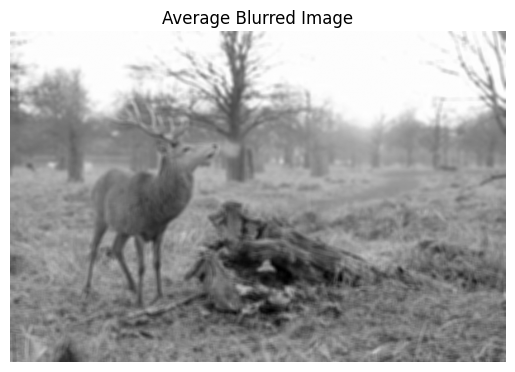

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Convert embedded PIL image to NumPy RGB
img_rgb = np.array(img).astype(np.float64)

# Convert RGB to grayscale (NumPy only)
img_gray = (
    0.299 * img_rgb[:, :, 0] +
    0.587 * img_rgb[:, :, 1] +
    0.114 * img_rgb[:, :, 2]
)

img_gray = img_gray.astype(np.float64)

def convolve(img, kernel):
    k = kernel.shape[0]
    pad = k // 2

    kernel = np.flipud(np.fliplr(kernel))
    padded = np.pad(img, pad_width=pad, mode='reflect')

    output = np.zeros_like(img, dtype=np.float64)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+k, j:j+k]
            output[i, j] = np.sum(region * kernel)

    return output

def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float64)
    kernel /= kernel.sum()
    return convolve(img, kernel)

avg_blurred = average_blur_gray(img_gray, 5)

plt.imshow(avg_blurred.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Average Blurred Image")
plt.show()


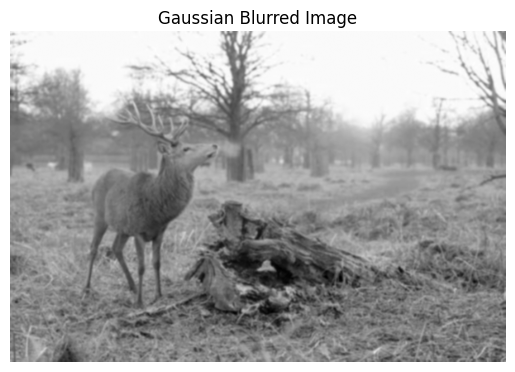

In [53]:
def gaussian_kernel(ksize, sigma):
    ax = np.linspace(-(ksize // 2), ksize // 2, ksize)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel

def gaussian_blur_gray(img, ksize, sigma):
    return convolve(img, gaussian_kernel(ksize, sigma))

gaussian_blurred = gaussian_blur_gray(img_gray, 5, 1)

plt.imshow(gaussian_blurred.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Gaussian Blurred Image")
plt.show()


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [54]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

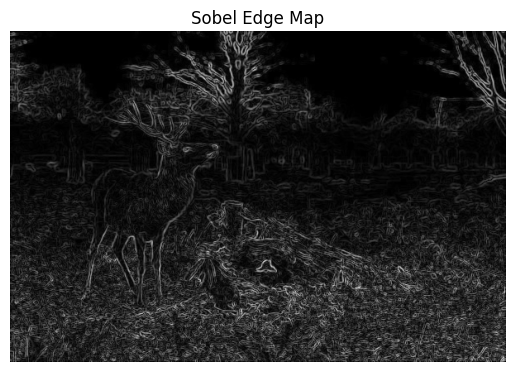

In [55]:
# Sobel kernels
Gx_kernel = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

Gy_kernel = np.array([[ 1,  2,  1],
                      [ 0,  0,  0],
                      [-1, -2, -1]])

Gx = convolve(img_gray, Gx_kernel)
Gy = convolve(img_gray, Gy_kernel)

gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

edge_map = (gradient_magnitude / gradient_magnitude.max()) * 255
edge_map = edge_map.astype(np.uint8)

plt.imshow(edge_map, cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Map")
plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



# Laplacian kernel (4-connected)
laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]])

lap = convolve(img_gray, laplacian_kernel)

alpha = 1.0
sharp_laplacian = img_gray - alpha * lap
sharp_laplacian = np.clip(sharp_laplacian, 0, 255)

plt.imshow(sharp_laplacian.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Laplacian Sharpened Image")
plt.show()

# Gaussian blur from Part A
blurred = gaussian_blur_gray(img_gray, 5, 1)

mask = img_gray - blurred

alpha = 1.5
sharp_unsharp = img_gray + alpha * mask
sharp_unsharp = np.clip(sharp_unsharp, 0, 255)

plt.imshow(sharp_unsharp.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Unsharp Masking Result")
plt.show()

In [56]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

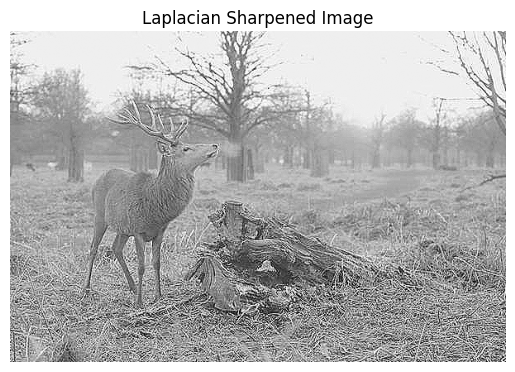

In [57]:
# Laplacian kernel (4-connected)
laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]])

lap = convolve(img_gray, laplacian_kernel)

alpha = 1.0
sharp_laplacian = img_gray - alpha * lap
sharp_laplacian = np.clip(sharp_laplacian, 0, 255)

plt.imshow(sharp_laplacian.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Laplacian Sharpened Image")
plt.show()


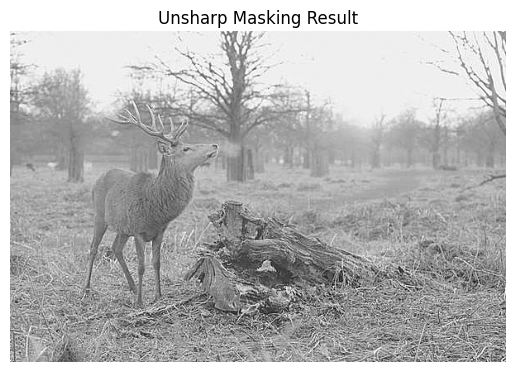

In [58]:
# Gaussian blur from Part A
blurred = gaussian_blur_gray(img_gray, 5, 1)

mask = img_gray - blurred

alpha = 1.5
sharp_unsharp = img_gray + alpha * mask
sharp_unsharp = np.clip(sharp_unsharp, 0, 255)

plt.imshow(sharp_unsharp.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Unsharp Masking Result")
plt.show()


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [59]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

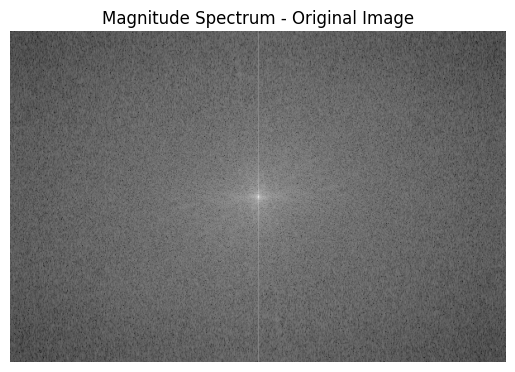

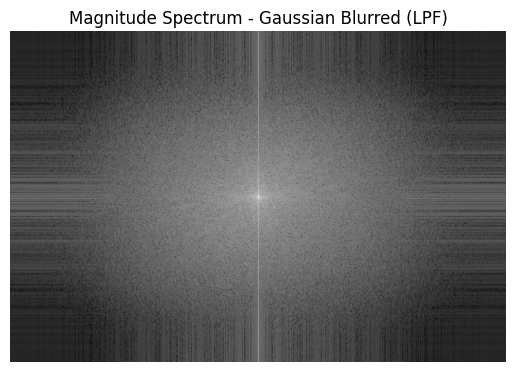

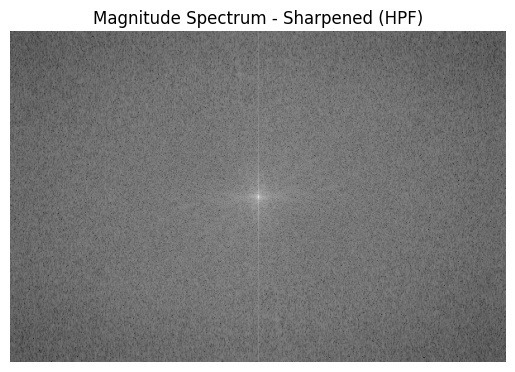

In [60]:
def magnitude_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.log(1 + np.abs(fshift))
    return magnitude

spec_original = magnitude_spectrum(img_gray)
spec_blurred  = magnitude_spectrum(blurred)
spec_sharp    = magnitude_spectrum(sharp_unsharp)

plt.imshow(spec_original, cmap='gray')
plt.axis('off')
plt.title("Magnitude Spectrum - Original Image")
plt.show()

plt.imshow(spec_blurred, cmap='gray')
plt.axis('off')
plt.title("Magnitude Spectrum - Gaussian Blurred (LPF)")
plt.show()

plt.imshow(spec_sharp, cmap='gray')
plt.axis('off')
plt.title("Magnitude Spectrum - Sharpened (HPF)")
plt.show()


### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

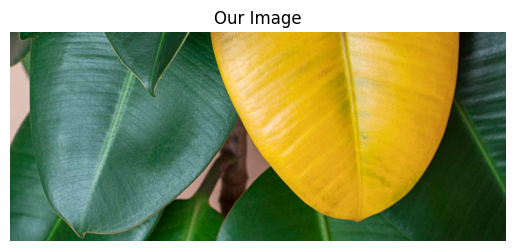

In [61]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

Saving download (1).png to download (1) (5).png


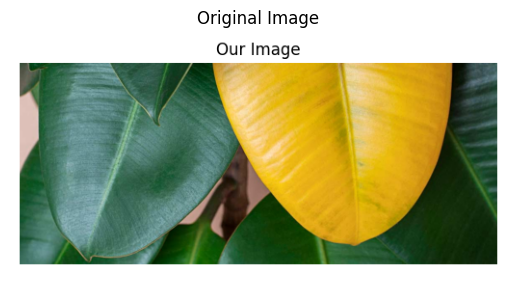

In [62]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Upload image ONLY for Section E
uploaded = files.upload()
img_name = list(uploaded.keys())[0]

img_E = Image.open(img_name).convert("RGB")
img_rgb_E = np.array(img_E, dtype=np.float32)

# Show the image used in Section E
plt.imshow(img_rgb_E.astype(np.uint8))
plt.axis('off')
plt.title("Original Image")
plt.show()


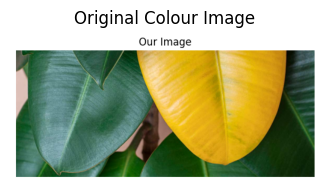

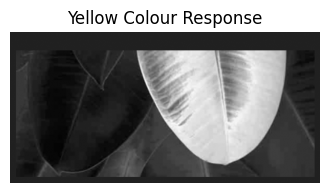

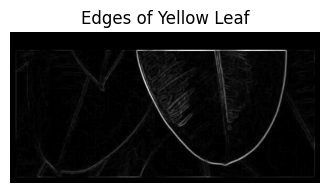

In [63]:
def convolve(img, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    img_padded = np.pad(
        img,
        ((pad_h, pad_h), (pad_w, pad_w)),
        mode='reflect'
    )

    H, W = img.shape
    out = np.zeros((H, W), dtype=np.float32)

    kernel = np.flipud(np.fliplr(kernel))

    for i in range(H):
        for j in range(W):
            region = img_padded[i:i+kh, j:j+kw]
            out[i, j] = np.sum(region * kernel)

    return out

R = rgb_img[:, :, 0]
G = rgb_img[:, :, 1]
B = rgb_img[:, :, 2]

# Yellow ≈ high R + high G − low B
yellow_response = R + G - 2 * B
yellow_norm = yellow_response - yellow_response.min()
yellow_norm = yellow_norm / yellow_norm.max()
yellow_norm = (yellow_norm * 255).astype(np.uint8)

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

Gx = convolve(yellow_norm.astype(np.float32), sobel_x)
Gy = convolve(yellow_norm.astype(np.float32), sobel_y)

yellow_edges = np.sqrt(Gx**2 + Gy**2)

yellow_edges = yellow_edges / yellow_edges.max()
yellow_edges = (yellow_edges * 255).astype(np.uint8)

def show(img, title, cmap=None):
    plt.figure(figsize=(4,4))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

show(rgb_img.astype(np.uint8), "Original Colour Image")
show(yellow_norm, "Yellow Colour Response", cmap="gray")
show(yellow_edges, "Edges of Yellow Leaf", cmap="gray")


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
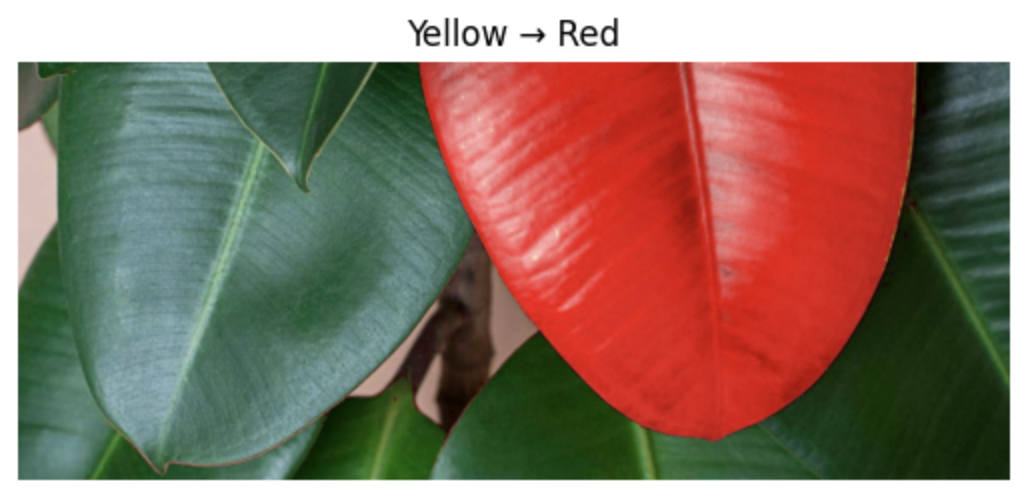

Also, we can change to a less brighter colour
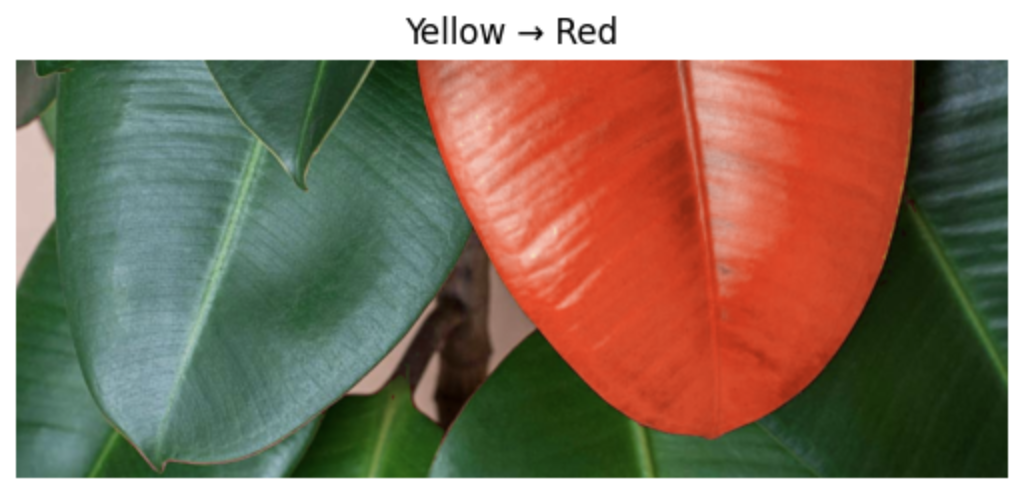

In [64]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.